# Notebook Projet Deep Learning : Employe attrition
--------------
## M2 - MLDS - Formation Altérnance
### Étudiants :
* HADDAD Ayale (haddad.ayale@gmail.com) 
* ISSELNANE Hacene (hacene.isselnane@etu.u-paris.fr)

In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

### 1. Preparation des donn´ees

In [3]:
employe = pd.read_csv('../../whole_data.csv')

In [4]:
employe.head()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,...,4.0,Y,12,8,2,9.0,2,6,0,4


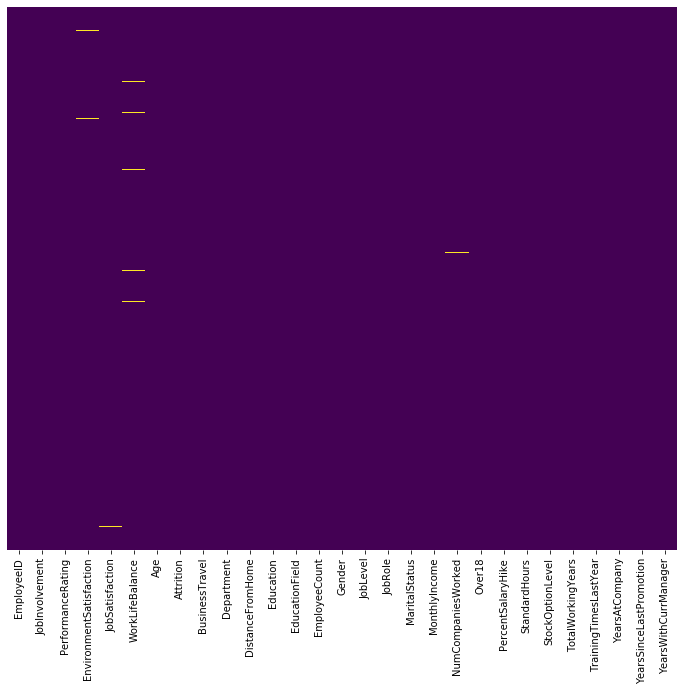

In [5]:
sns.heatmap(employe.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
employe = employe.dropna()
employe.isnull().sum()

EmployeeID                 0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [7]:
employe.describe()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,EmployeeCount,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.0,...,4300.000000,4300.000000,4300.000000,4300.0,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,2211.695116,2.728837,3.153953,2.723953,2.724884,2.761163,36.926977,9.197907,2.913256,1.0,...,65059.844186,2.690000,15.210698,8.0,0.795349,11.285116,2.796279,7.026047,2.190000,4.132558
std,1272.117692,0.710769,0.360946,1.093802,1.101875,0.707800,9.146517,8.097059,1.024774,0.0,...,47045.398914,2.495764,3.662777,0.0,0.853534,7.790052,1.290142,6.148036,3.230818,3.565831
min,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.0,...,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1110.750000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,1.0,...,29260.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,2215.500000,3.000000,3.000000,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,1.0,...,49360.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,3314.250000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,1.0,...,83802.500000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.250000,3.000000,7.000000
max,4409.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,1.0,...,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [8]:
employe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   JobInvolvement           4300 non-null   int64  
 2   PerformanceRating        4300 non-null   int64  
 3   EnvironmentSatisfaction  4300 non-null   float64
 4   JobSatisfaction          4300 non-null   float64
 5   WorkLifeBalance          4300 non-null   float64
 6   Age                      4300 non-null   int64  
 7   Attrition                4300 non-null   object 
 8   BusinessTravel           4300 non-null   object 
 9   Department               4300 non-null   object 
 10  DistanceFromHome         4300 non-null   int64  
 11  Education                4300 non-null   int64  
 12  EducationField           4300 non-null   object 
 13  EmployeeCount            4300 non-null   int64  
 14  Gender                  

In [9]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

for i in employe.columns:
    if isinstance(employe[i][0],str):
        employe[i] = encoder.fit_transform(employe[i])

In [10]:
employe.head()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,0,2,2,...,1.0,0,11,8,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,1,1,1,...,0.0,0,23,8,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,0,1,1,...,1.0,0,15,8,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,0,0,1,...,3.0,0,11,8,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,0,2,1,...,4.0,0,12,8,2,9.0,2,6,0,4


In [11]:
neg, pos = np.bincount(employe['Attrition'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 4300
    Positive: 695 (16.16% of total)



In [12]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(employe, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Attrition'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Attrition'))
test_labels = np.array(test_df.pop('Attrition'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [13]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

#train_features = np.clip(train_features, -5, 5)
#val_features = np.clip(val_features, -5, 5)
#test_features = np.clip(test_features, -5, 5)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (2752,)
Validation labels shape: (688,)
Test labels shape: (860,)
Training features shape: (2752, 28)
Validation features shape: (688, 28)
Test features shape: (860, 28)


In [14]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

In [15]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model_baseline(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

    model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

    return model

## Baseline model

In [16]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)


In [17]:
model = make_model_baseline()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                464       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.predict(train_features[:10])

array([[0.7581076 ],
       [0.8596712 ],
       [0.7778654 ],
       [0.5473572 ],
       [0.85437644],
       [0.6555499 ],
       [0.8301771 ],
       [0.6957114 ],
       [0.5805448 ],
       [0.80390626]], dtype=float32)

In [19]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))


Loss: 1.4099


In [20]:
initial_bias = np.log([pos/neg])
initial_bias

array([-1.6461652])

In [21]:
model = make_model_baseline(output_bias=initial_bias)
model.predict(train_features[:10])


array([[0.08667924],
       [0.285032  ],
       [0.16590738],
       [0.549804  ],
       [0.12323369],
       [0.5063672 ],
       [0.23761506],
       [0.63133824],
       [0.15832266],
       [0.5214627 ]], dtype=float32)

In [22]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))


Loss: 0.5547


In [23]:
initial_weights_baseline = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights_baseline)


In [24]:
model = make_model_baseline()
model.load_weights(initial_weights_baseline)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)


In [25]:
model = make_model_baseline()
model.load_weights(initial_weights_baseline)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)


In [26]:
def plot_loss(history, label, n):
    # Use a log scale to show the wide range of values.
    plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train '+label)
    plt.semilogy(history.epoch, history.history['val_loss'],
          color=colors[n], label='Val '+label,
          linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend()


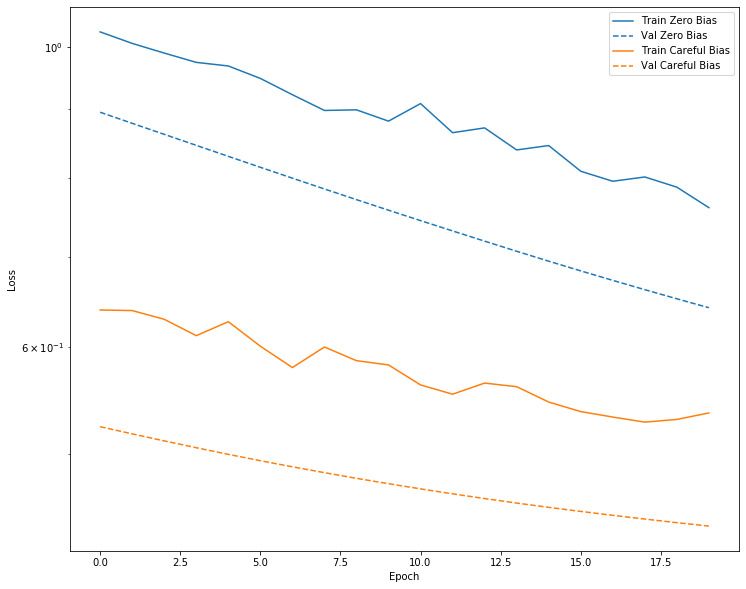

In [27]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)


In [28]:
model = make_model_baseline()
model.load_weights(initial_weights_baseline)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))


Train on 2752 samples, validate on 688 samples
Epoch 1/100
2752/2752 [==============================] - 2s 768us/sample - loss: 0.6484 - tp: 55.0000 - fp: 359.0000 - tn: 1931.0000 - fn: 407.0000 - accuracy: 0.7217 - precision: 0.1329 - recall: 0.1190 - auc: 0.4698 - val_loss: 0.5238 - val_tp: 2.0000 - val_fp: 37.0000 - val_tn: 545.0000 - val_fn: 104.0000 - val_accuracy: 0.7951 - val_precision: 0.0513 - val_recall: 0.0189 - val_auc: 0.4273
Epoch 2/100
2752/2752 [==============================] - 0s 11us/sample - loss: 0.6424 - tp: 52.0000 - fp: 325.0000 - tn: 1965.0000 - fn: 410.0000 - accuracy: 0.7329 - precision: 0.1379 - recall: 0.1126 - auc: 0.4528 - val_loss: 0.5173 - val_tp: 2.0000 - val_fp: 33.0000 - val_tn: 549.0000 - val_fn: 104.0000 - val_accuracy: 0.8009 - val_precision: 0.0571 - val_recall: 0.0189 - val_auc: 0.4323
Epoch 3/100
2752/2752 [==============================] - 0s 10us/sample - loss: 0.6269 - tp: 47.0000 - fp: 302.0000 - tn: 1988.0000 - fn: 415.0000 - accuracy: 0.7

Epoch 22/100
2752/2752 [==============================] - 0s 10us/sample - loss: 0.5204 - tp: 35.0000 - fp: 125.0000 - tn: 2165.0000 - fn: 427.0000 - accuracy: 0.7994 - precision: 0.2188 - recall: 0.0758 - auc: 0.5313 - val_loss: 0.4378 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 582.0000 - val_fn: 105.0000 - val_accuracy: 0.8474 - val_precision: 1.0000 - val_recall: 0.0094 - val_auc: 0.5460
Epoch 23/100
2752/2752 [==============================] - 0s 10us/sample - loss: 0.5069 - tp: 35.0000 - fp: 119.0000 - tn: 2171.0000 - fn: 427.0000 - accuracy: 0.8016 - precision: 0.2273 - recall: 0.0758 - auc: 0.5616 - val_loss: 0.4356 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 582.0000 - val_fn: 105.0000 - val_accuracy: 0.8474 - val_precision: 1.0000 - val_recall: 0.0094 - val_auc: 0.5538
Epoch 24/100
2752/2752 [==============================] - 0s 11us/sample - loss: 0.5233 - tp: 33.0000 - fp: 135.0000 - tn: 2155.0000 - fn: 429.0000 - accuracy: 0.7951 - precision: 0.1964 - recall: 0.071

2752/2752 [==============================] - 0s 9us/sample - loss: 0.4717 - tp: 28.0000 - fp: 66.0000 - tn: 2224.0000 - fn: 434.0000 - accuracy: 0.8183 - precision: 0.2979 - recall: 0.0606 - auc: 0.5996 - val_loss: 0.4081 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 582.0000 - val_fn: 106.0000 - val_accuracy: 0.8459 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6543
Epoch 43/100
2752/2752 [==============================] - 0s 11us/sample - loss: 0.4757 - tp: 32.0000 - fp: 83.0000 - tn: 2207.0000 - fn: 430.0000 - accuracy: 0.8136 - precision: 0.2783 - recall: 0.0693 - auc: 0.5979 - val_loss: 0.4072 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 582.0000 - val_fn: 106.0000 - val_accuracy: 0.8459 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6572
Epoch 44/100
2752/2752 [==============================] - 0s 10us/sample - loss: 0.4780 - tp: 32.0000 - fp: 75.0000 - tn: 2215.0000 - fn: 430.0000 - accuracy: 0.8165 - precision: 0.2991 - recall

2752/2752 [==============================] - 0s 10us/sample - loss: 0.4296 - tp: 47.0000 - fp: 53.0000 - tn: 2237.0000 - fn: 415.0000 - accuracy: 0.8299 - precision: 0.4700 - recall: 0.1017 - auc: 0.6746 - val_loss: 0.3931 - val_tp: 0.0000e+00 - val_fp: 1.0000 - val_tn: 581.0000 - val_fn: 106.0000 - val_accuracy: 0.8445 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7138
Epoch 63/100
2752/2752 [==============================] - 0s 11us/sample - loss: 0.4458 - tp: 31.0000 - fp: 35.0000 - tn: 2255.0000 - fn: 431.0000 - accuracy: 0.8307 - precision: 0.4697 - recall: 0.0671 - auc: 0.6410 - val_loss: 0.3926 - val_tp: 0.0000e+00 - val_fp: 1.0000 - val_tn: 581.0000 - val_fn: 106.0000 - val_accuracy: 0.8445 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7148
Epoch 64/100
2752/2752 [==============================] - 0s 11us/sample - loss: 0.4426 - tp: 46.0000 - fp: 53.0000 - tn: 2237.0000 - fn: 416.0000 - accuracy: 0.8296 - precision: 0.4646 - recall: 0.099

2752/2752 [==============================] - 0s 10us/sample - loss: 0.4321 - tp: 32.0000 - fp: 53.0000 - tn: 2237.0000 - fn: 430.0000 - accuracy: 0.8245 - precision: 0.3765 - recall: 0.0693 - auc: 0.6750 - val_loss: 0.3845 - val_tp: 0.0000e+00 - val_fp: 2.0000 - val_tn: 580.0000 - val_fn: 106.0000 - val_accuracy: 0.8430 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7382
Epoch 83/100
2752/2752 [==============================] - 0s 11us/sample - loss: 0.4281 - tp: 36.0000 - fp: 34.0000 - tn: 2256.0000 - fn: 426.0000 - accuracy: 0.8328 - precision: 0.5143 - recall: 0.0779 - auc: 0.6770 - val_loss: 0.3841 - val_tp: 0.0000e+00 - val_fp: 2.0000 - val_tn: 580.0000 - val_fn: 106.0000 - val_accuracy: 0.8430 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7407
Epoch 84/100
2752/2752 [==============================] - 0s 11us/sample - loss: 0.4368 - tp: 36.0000 - fp: 40.0000 - tn: 2250.0000 - fn: 426.0000 - accuracy: 0.8307 - precision: 0.4737 - recall: 0.077

In [29]:
def plot_metrics(history):
    metrics = ['loss', 'auc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
    if metric == 'loss':
        plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
        plt.ylim([0.8,1])
    else:
        plt.ylim([0,1])
    plt.legend()

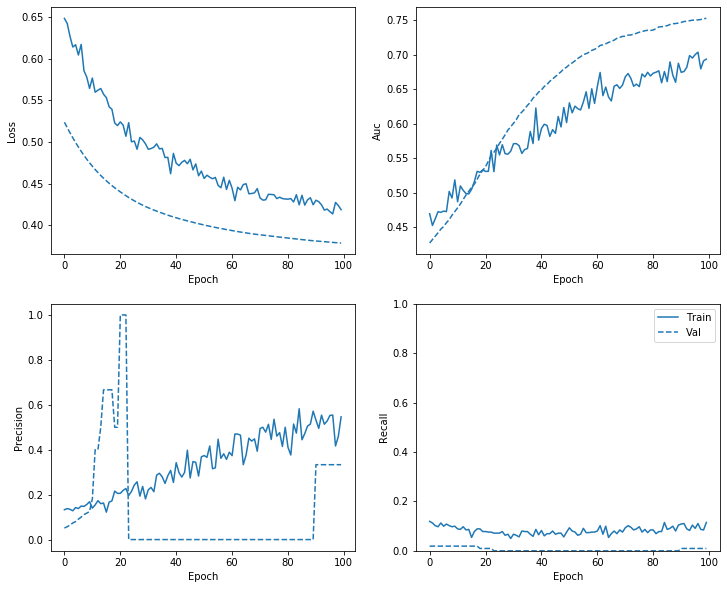

In [30]:
plot_metrics(baseline_history)

In [31]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))


In [32]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)


loss :  0.3822247385978699
tp :  1.0
fp :  0.0
tn :  733.0
fn :  126.0
accuracy :  0.8534884
precision :  1.0
recall :  0.007874016
auc :  0.7162884

Legitimate Transactions Detected (True Negatives):  733
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  126
Fraudulent Transactions Detected (True Positives):  1
Total Fraudulent Transactions:  127


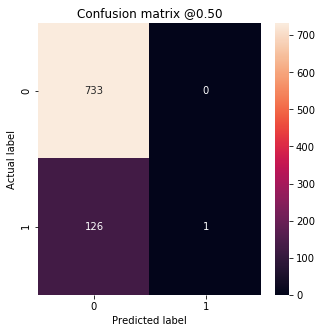

In [33]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
print()
plot_cm(test_labels, test_predictions_baseline)


In [34]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,20])
    plt.ylim([80,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')


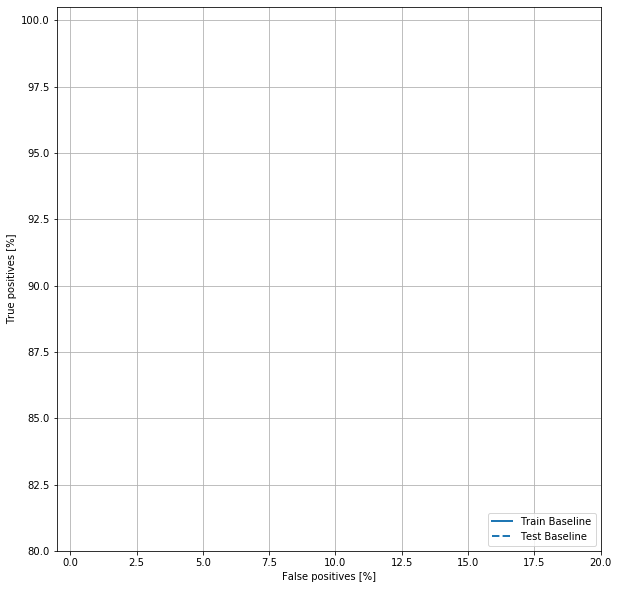

In [35]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')


### Modele plus elaboré

In [36]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]
def make_model_elab(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
      keras.layers.Dense(
          128, activation='relu',
          input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(
          64, activation='relu',
          input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(
          32, activation='relu',
          input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(
          32, activation='relu',
          input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.2),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),])

    model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

    return model

In [37]:
model = make_model_elab()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               3712      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)               

In [38]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.5908


In [39]:
initial_weights_elab = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights_elab)
model = make_model_elab()
model.load_weights(initial_weights_elab)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)


In [40]:
model_elab = make_model_elab()
model.load_weights(initial_weights_elab)
careful_bias_history = model_elab.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

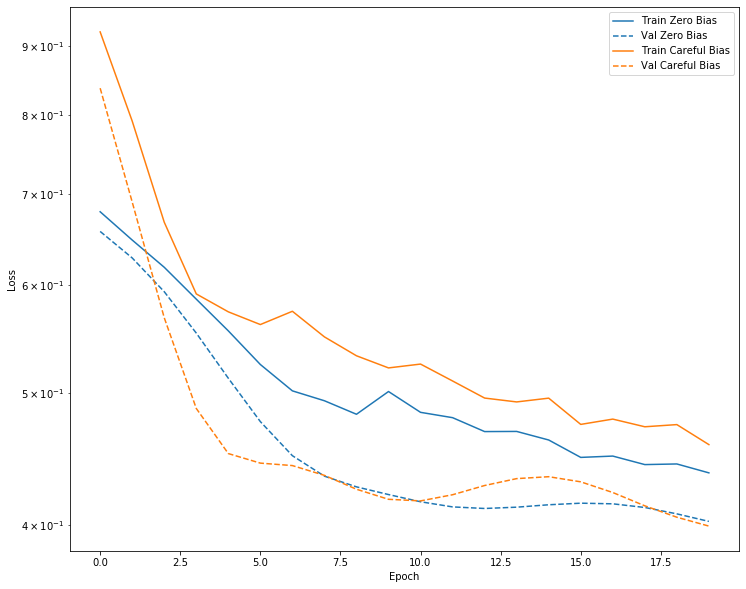

In [41]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

loss :  0.40259549021720886
tp :  4.0
fp :  3.0
tn :  730.0
fn :  123.0
accuracy :  0.8534884
precision :  0.5714286
recall :  0.031496063
auc :  0.69809645

Legitimate Transactions Detected (True Negatives):  730
Legitimate Transactions Incorrectly Detected (False Positives):  3
Fraudulent Transactions Missed (False Negatives):  123
Fraudulent Transactions Detected (True Positives):  4
Total Fraudulent Transactions:  127


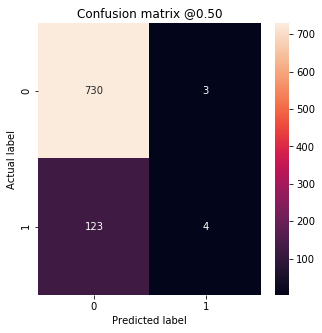

In [110]:
train_predictions_elab = model_elab.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_elab = model_elab.predict(test_features, batch_size=BATCH_SIZE)
elab_results = model_elab.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model_elab.metrics_names, elab_results):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_elab)


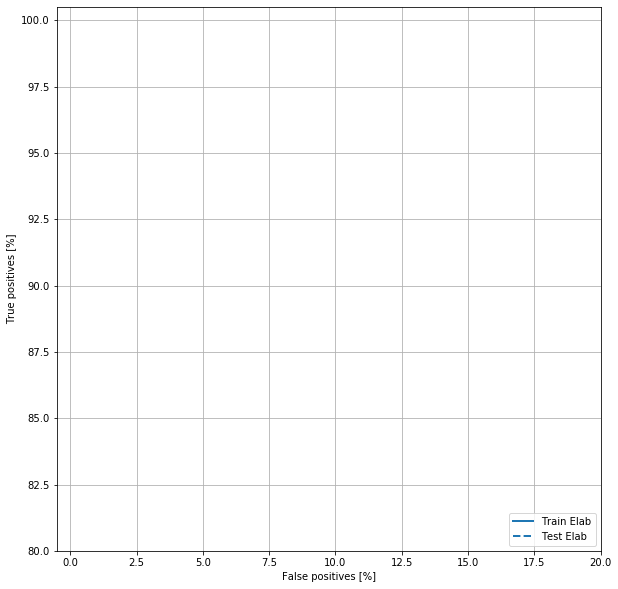

In [43]:
plot_roc("Train Elab", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Elab", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')


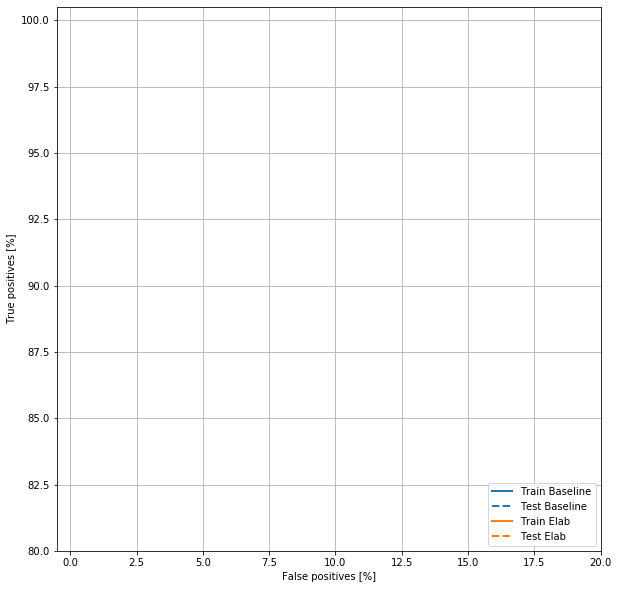

In [44]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plot_roc("Train Elab", train_labels, train_predictions_elab, color=colors[1])
plot_roc("Test Elab", test_labels, test_predictions_elab, color=colors[1], linestyle='--')
plt.legend(loc='lower right')

## Class weights

In [45]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))


Weight for class 0: 0.60
Weight for class 1: 3.09


In [46]:
weighted_model = make_model_baseline()
weighted_model.load_weights(initial_weights_baseline)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 2752 samples, validate on 688 samples
Epoch 1/100
2752/2752 [==============================] - 3s 997us/sample - loss: 1.1328 - tp: 58.0000 - fp: 324.0000 - tn: 1966.0000 - fn: 404.0000 - accuracy: 0.7355 - precision: 0.1518 - recall: 0.1255 - auc: 0.4660 - val_loss: 0.9984 - val_tp: 2.0000 - val_fp: 40.0000 - val_tn: 542.0000 - val_fn: 104.0000 - val_accuracy: 0.7907 - val_precision: 0.0476 - val_recall: 0.0189 - val_auc: 0.4283
Epoch 2/100
2752/2752 [==============================] - 0s 11us/sample - loss: 1.1442 - tp: 60.0000 - fp: 346.0000 - tn: 1944.0000 - fn: 402.0000 - accuracy: 0.7282 - precision: 0.1478 - recall: 0.1299 - auc: 0.4520 - val_loss: 0.9848 - val_tp: 2.0000 - val_fp: 41.0000 - val_tn: 541.0000 - val_fn: 104.0000 - val_accuracy: 0.7892 - val_precision: 0.0465 - val_recall: 0.0189 - val_auc: 0.4346
Epoch 3/100
2752/2752 [==============================] - 0s 11us/sample - loss: 1.1280 - tp: 55.0000 - fp: 379.0

2752/2752 [==============================] - 0s 10us/sample - loss: 0.9561 - tp: 100.0000 - fp: 465.0000 - tn: 1825.0000 - fn: 362.0000 - accuracy: 0.6995 - precision: 0.1770 - recall: 0.2165 - auc: 0.5197 - val_loss: 0.7859 - val_tp: 11.0000 - val_fp: 44.0000 - val_tn: 538.0000 - val_fn: 95.0000 - val_accuracy: 0.7980 - val_precision: 0.2000 - val_recall: 0.1038 - val_auc: 0.5498
Epoch 22/100
2752/2752 [==============================] - 0s 11us/sample - loss: 0.9386 - tp: 111.0000 - fp: 457.0000 - tn: 1833.0000 - fn: 351.0000 - accuracy: 0.7064 - precision: 0.1954 - recall: 0.2403 - auc: 0.5293 - val_loss: 0.7783 - val_tp: 12.0000 - val_fp: 45.0000 - val_tn: 537.0000 - val_fn: 94.0000 - val_accuracy: 0.7980 - val_precision: 0.2105 - val_recall: 0.1132 - val_auc: 0.5560
Epoch 23/100
2752/2752 [==============================] - 0s 11us/sample - loss: 0.9190 - tp: 114.0000 - fp: 477.0000 - tn: 1813.0000 - fn: 348.0000 - accuracy: 0.7002 - precision: 0.1929 - recall: 0.2468 - auc: 0.5325 

Epoch 42/100
2752/2752 [==============================] - 0s 10us/sample - loss: 0.7961 - tp: 174.0000 - fp: 559.0000 - tn: 1731.0000 - fn: 288.0000 - accuracy: 0.6922 - precision: 0.2374 - recall: 0.3766 - auc: 0.6021 - val_loss: 0.6704 - val_tp: 31.0000 - val_fp: 69.0000 - val_tn: 513.0000 - val_fn: 75.0000 - val_accuracy: 0.7907 - val_precision: 0.3100 - val_recall: 0.2925 - val_auc: 0.6645
Epoch 43/100
2752/2752 [==============================] - 0s 10us/sample - loss: 0.8056 - tp: 173.0000 - fp: 579.0000 - tn: 1711.0000 - fn: 289.0000 - accuracy: 0.6846 - precision: 0.2301 - recall: 0.3745 - auc: 0.5999 - val_loss: 0.6670 - val_tp: 34.0000 - val_fp: 72.0000 - val_tn: 510.0000 - val_fn: 72.0000 - val_accuracy: 0.7907 - val_precision: 0.3208 - val_recall: 0.3208 - val_auc: 0.6683
Epoch 44/100
2752/2752 [==============================] - 0s 11us/sample - loss: 0.7812 - tp: 169.0000 - fp: 591.0000 - tn: 1699.0000 - fn: 293.0000 - accuracy: 0.6788 - precision: 0.2224 - recall: 0.3658 -

Epoch 63/100
2752/2752 [==============================] - 0s 11us/sample - loss: 0.7500 - tp: 202.0000 - fp: 584.0000 - tn: 1706.0000 - fn: 260.0000 - accuracy: 0.6933 - precision: 0.2570 - recall: 0.4372 - auc: 0.6285 - val_loss: 0.6190 - val_tp: 49.0000 - val_fp: 93.0000 - val_tn: 489.0000 - val_fn: 57.0000 - val_accuracy: 0.7820 - val_precision: 0.3451 - val_recall: 0.4623 - val_auc: 0.7187
Epoch 64/100
2752/2752 [==============================] - 0s 11us/sample - loss: 0.7319 - tp: 214.0000 - fp: 584.0000 - tn: 1706.0000 - fn: 248.0000 - accuracy: 0.6977 - precision: 0.2682 - recall: 0.4632 - auc: 0.6437 - val_loss: 0.6175 - val_tp: 50.0000 - val_fp: 97.0000 - val_tn: 485.0000 - val_fn: 56.0000 - val_accuracy: 0.7776 - val_precision: 0.3401 - val_recall: 0.4717 - val_auc: 0.7202
Epoch 65/100
2752/2752 [==============================] - 0s 11us/sample - loss: 0.7336 - tp: 212.0000 - fp: 607.0000 - tn: 1683.0000 - fn: 250.0000 - accuracy: 0.6886 - precision: 0.2589 - recall: 0.4589 -

2752/2752 [==============================] - 0s 11us/sample - loss: 0.7025 - tp: 231.0000 - fp: 616.0000 - tn: 1674.0000 - fn: 231.0000 - accuracy: 0.6922 - precision: 0.2727 - recall: 0.5000 - auc: 0.6715 - val_loss: 0.5963 - val_tp: 56.0000 - val_fp: 112.0000 - val_tn: 470.0000 - val_fn: 50.0000 - val_accuracy: 0.7645 - val_precision: 0.3333 - val_recall: 0.5283 - val_auc: 0.7427
Epoch 84/100
2752/2752 [==============================] - 0s 11us/sample - loss: 0.6830 - tp: 237.0000 - fp: 578.0000 - tn: 1712.0000 - fn: 225.0000 - accuracy: 0.7082 - precision: 0.2908 - recall: 0.5130 - auc: 0.6864 - val_loss: 0.5955 - val_tp: 57.0000 - val_fp: 114.0000 - val_tn: 468.0000 - val_fn: 49.0000 - val_accuracy: 0.7631 - val_precision: 0.3333 - val_recall: 0.5377 - val_auc: 0.7435
Epoch 85/100
2752/2752 [==============================] - 0s 11us/sample - loss: 0.7177 - tp: 225.0000 - fp: 611.0000 - tn: 1679.0000 - fn: 237.0000 - accuracy: 0.6919 - precision: 0.2691 - recall: 0.4870 - auc: 0.656

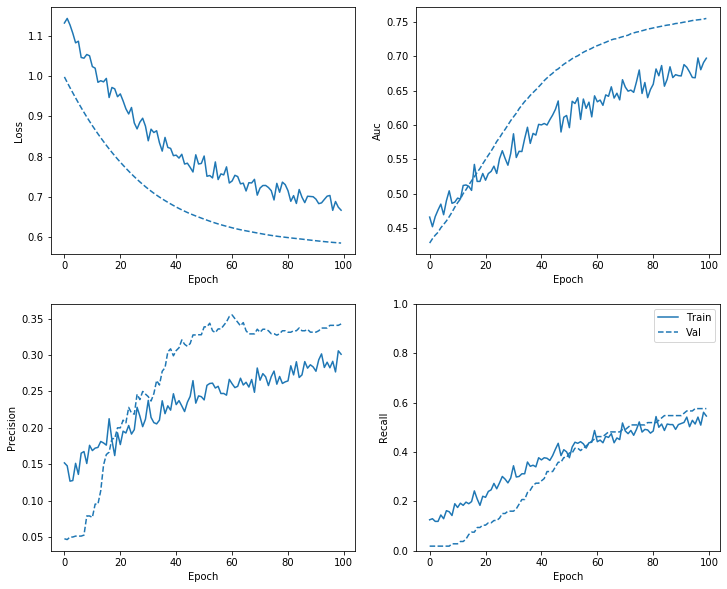

In [47]:
plot_metrics(weighted_history)

loss :  0.5308561325073242
tp :  69.0
fp :  146.0
tn :  587.0
fn :  58.0
accuracy :  0.7627907
precision :  0.32093024
recall :  0.54330707
auc :  0.7339109

Legitimate Transactions Detected (True Negatives):  587
Legitimate Transactions Incorrectly Detected (False Positives):  146
Fraudulent Transactions Missed (False Negatives):  58
Fraudulent Transactions Detected (True Positives):  69
Total Fraudulent Transactions:  127


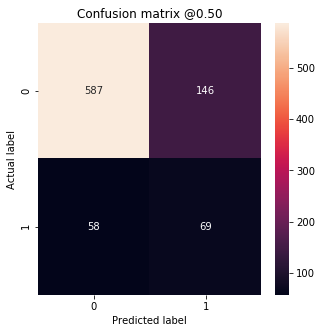

In [48]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)


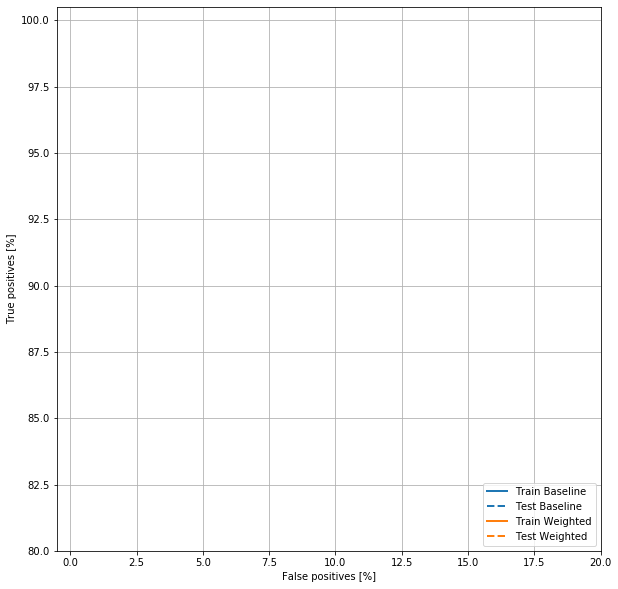

In [49]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')


### Modele elaboré

In [50]:
weighted_model_elab = make_model_elab()
weighted_model_elab.load_weights(initial_weights_elab)

weighted_history_elab = weighted_model_elab.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 2752 samples, validate on 688 samples
Epoch 1/100
2752/2752 [==============================] - 3s 1ms/sample - loss: 0.7347 - tp: 13.0000 - fp: 64.0000 - tn: 2226.0000 - fn: 449.0000 - accuracy: 0.8136 - precision: 0.1688 - recall: 0.0281 - auc: 0.4956 - val_loss: 0.6876 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 582.0000 - val_fn: 106.0000 - val_accuracy: 0.8459 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5032
Epoch 2/100
2752/2752 [==============================] - 0s 12us/sample - loss: 0.7207 - tp: 28.0000 - fp: 109.0000 - tn: 2181.0000 - fn: 434.0000 - accuracy: 0.8027 - precision: 0.2044 - recall: 0.0606 - auc: 0.5091 - val_loss: 0.6817 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 582.0000 - val_fn: 106.0000 - val_accuracy: 0.8459 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5590
Epoch 3/100
2752/2752 [==============================] - 0s 13us/sample - loss: 0.716

Epoch 21/100
2752/2752 [==============================] - 0s 11us/sample - loss: 0.6250 - tp: 296.0000 - fp: 600.0000 - tn: 1690.0000 - fn: 166.0000 - accuracy: 0.7217 - precision: 0.3304 - recall: 0.6407 - auc: 0.7356 - val_loss: 0.5907 - val_tp: 71.0000 - val_fp: 173.0000 - val_tn: 409.0000 - val_fn: 35.0000 - val_accuracy: 0.6977 - val_precision: 0.2910 - val_recall: 0.6698 - val_auc: 0.7637
Epoch 22/100
2752/2752 [==============================] - 0s 11us/sample - loss: 0.6151 - tp: 296.0000 - fp: 610.0000 - tn: 1680.0000 - fn: 166.0000 - accuracy: 0.7180 - precision: 0.3267 - recall: 0.6407 - auc: 0.7407 - val_loss: 0.5869 - val_tp: 71.0000 - val_fp: 171.0000 - val_tn: 411.0000 - val_fn: 35.0000 - val_accuracy: 0.7006 - val_precision: 0.2934 - val_recall: 0.6698 - val_auc: 0.7611
Epoch 23/100
2752/2752 [==============================] - 0s 11us/sample - loss: 0.6251 - tp: 286.0000 - fp: 595.0000 - tn: 1695.0000 - fn: 176.0000 - accuracy: 0.7198 - precision: 0.3246 - recall: 0.6190

loss :  0.6386988162994385
tp :  75.0
fp :  181.0
tn :  552.0
fn :  52.0
accuracy :  0.72906977
precision :  0.29296875
recall :  0.5905512
auc :  0.74004465

Legitimate Transactions Detected (True Negatives):  552
Legitimate Transactions Incorrectly Detected (False Positives):  181
Fraudulent Transactions Missed (False Negatives):  52
Fraudulent Transactions Detected (True Positives):  75
Total Fraudulent Transactions:  127


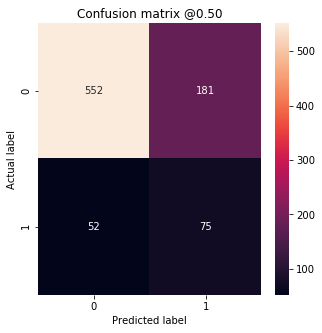

In [51]:
train_predictions_weighted_elab = weighted_model_elab.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted_elab = weighted_model_elab.predict(test_features, batch_size=BATCH_SIZE)

weighted_results_elab = weighted_model_elab.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model_elab.metrics_names, weighted_results_elab):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted_elab)

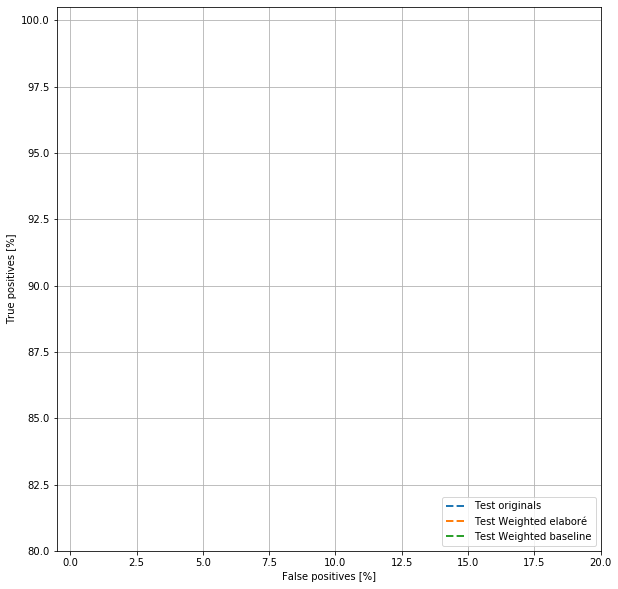

In [52]:

plot_roc("Test originals", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')


plot_roc("Test Weighted elaboré", test_labels, test_predictions_weighted_elab, color=colors[1], linestyle='--')

plot_roc("Test Weighted baseline", test_labels, test_predictions_weighted, color=colors[2], linestyle='--')

plt.legend(loc='lower right')

## Oversampling
### Random Sampling

In [53]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]


In [54]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(2290, 28)

In [55]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(4580, 28)

In [56]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
    ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
    ds = ds.shuffle(BUFFER_SIZE).repeat()
    return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)


In [57]:
for features, label in pos_ds.take(1):
    print("Features:\n", features.numpy())
    print()
    print("Label: ", label.numpy())


Features:
 [-1.67153373  0.39167682 -0.43270125  1.17897864  1.14403543  0.33601047
 -1.17122523  0.59029989 -0.48070872 -0.14917571  0.08940357  0.57182317
  0.          0.82966473 -0.06493077 -0.60305902  1.22507794  1.95051337
 -0.67670107  0.         -0.88103484  0.          1.40980244 -0.4115575
  1.72979196  0.18417161  1.5272557  -0.02350526]

Label:  1


In [58]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

for features, label in resampled_ds.take(1):
    print(label.numpy().mean())


0.49267578125


In [59]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

4.0

In [60]:
resampled_model_baseline = make_model_baseline()
resampled_model_baseline.load_weights(initial_weights_baseline)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model_baseline.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model_baseline.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)


Train for 4.0 steps, validate for 1 steps
Epoch 1/100
4/4 [==============================] - 3s 639ms/step - loss: 0.9414 - tp: 2262.0000 - fp: 2360.0000 - tn: 1734.0000 - fn: 1836.0000 - accuracy: 0.4878 - precision: 0.4894 - recall: 0.5520 - auc: 0.4658 - val_loss: 0.8911 - val_tp: 54.0000 - val_fp: 377.0000 - val_tn: 205.0000 - val_fn: 52.0000 - val_accuracy: 0.3765 - val_precision: 0.1253 - val_recall: 0.5094 - val_auc: 0.4328
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 0.9223 - tp: 2233.0000 - fp: 2383.0000 - tn: 1759.0000 - fn: 1817.0000 - accuracy: 0.4873 - precision: 0.4838 - recall: 0.5514 - auc: 0.4739 - val_loss: 0.8709 - val_tp: 54.0000 - val_fp: 373.0000 - val_tn: 209.0000 - val_fn: 52.0000 - val_accuracy: 0.3823 - val_precision: 0.1265 - val_recall: 0.5094 - val_auc: 0.4443
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 0.8993 - tp: 2271.0000 - fp: 2363.0000 - tn: 1759.0000 - fn: 1799.0000 - accuracy: 0.4919 - precision

Epoch 22/100
4/4 [==============================] - 0s 23ms/step - loss: 0.7012 - tp: 2580.0000 - fp: 1813.0000 - tn: 2266.0000 - fn: 1533.0000 - accuracy: 0.5916 - precision: 0.5873 - recall: 0.6273 - auc: 0.6223 - val_loss: 0.6596 - val_tp: 74.0000 - val_fp: 251.0000 - val_tn: 331.0000 - val_fn: 32.0000 - val_accuracy: 0.5887 - val_precision: 0.2277 - val_recall: 0.6981 - val_auc: 0.6935
Epoch 23/100
4/4 [==============================] - 0s 24ms/step - loss: 0.7011 - tp: 2541.0000 - fp: 1825.0000 - tn: 2269.0000 - fn: 1557.0000 - accuracy: 0.5872 - precision: 0.5820 - recall: 0.6201 - auc: 0.6211 - val_loss: 0.6545 - val_tp: 73.0000 - val_fp: 239.0000 - val_tn: 343.0000 - val_fn: 33.0000 - val_accuracy: 0.6047 - val_precision: 0.2340 - val_recall: 0.6887 - val_auc: 0.6988
Epoch 24/100
4/4 [==============================] - 0s 22ms/step - loss: 0.6913 - tp: 2546.0000 - fp: 1769.0000 - tn: 2310.0000 - fn: 1567.0000 - accuracy: 0.5928 - precision: 0.5900 - recall: 0.6190 - auc: 0.6310 

4/4 [==============================] - 0s 23ms/step - loss: 0.6328 - tp: 2721.0000 - fp: 1505.0000 - tn: 2565.0000 - fn: 1401.0000 - accuracy: 0.6453 - precision: 0.6439 - recall: 0.6601 - auc: 0.7014 - val_loss: 0.6027 - val_tp: 75.0000 - val_fp: 180.0000 - val_tn: 402.0000 - val_fn: 31.0000 - val_accuracy: 0.6933 - val_precision: 0.2941 - val_recall: 0.7075 - val_auc: 0.7582
Epoch 43/100
4/4 [==============================] - 0s 23ms/step - loss: 0.6272 - tp: 2698.0000 - fp: 1439.0000 - tn: 2648.0000 - fn: 1407.0000 - accuracy: 0.6526 - precision: 0.6522 - recall: 0.6572 - auc: 0.7099 - val_loss: 0.6007 - val_tp: 74.0000 - val_fp: 178.0000 - val_tn: 404.0000 - val_fn: 32.0000 - val_accuracy: 0.6948 - val_precision: 0.2937 - val_recall: 0.6981 - val_auc: 0.7595
Epoch 44/100
4/4 [==============================] - 0s 25ms/step - loss: 0.6246 - tp: 2746.0000 - fp: 1443.0000 - tn: 2678.0000 - fn: 1325.0000 - accuracy: 0.6621 - precision: 0.6555 - recall: 0.6745 - auc: 0.7139 - val_loss: 0

4/4 [==============================] - 0s 23ms/step - loss: 0.5888 - tp: 2798.0000 - fp: 1249.0000 - tn: 2835.0000 - fn: 1310.0000 - accuracy: 0.6876 - precision: 0.6914 - recall: 0.6811 - auc: 0.7518 - val_loss: 0.5705 - val_tp: 71.0000 - val_fp: 155.0000 - val_tn: 427.0000 - val_fn: 35.0000 - val_accuracy: 0.7238 - val_precision: 0.3142 - val_recall: 0.6698 - val_auc: 0.7778
Epoch 63/100
4/4 [==============================] - 0s 24ms/step - loss: 0.5939 - tp: 2787.0000 - fp: 1246.0000 - tn: 2860.0000 - fn: 1299.0000 - accuracy: 0.6893 - precision: 0.6910 - recall: 0.6821 - auc: 0.7476 - val_loss: 0.5693 - val_tp: 72.0000 - val_fp: 155.0000 - val_tn: 427.0000 - val_fn: 34.0000 - val_accuracy: 0.7253 - val_precision: 0.3172 - val_recall: 0.6792 - val_auc: 0.7783
Epoch 64/100
4/4 [==============================] - 0s 24ms/step - loss: 0.5912 - tp: 2816.0000 - fp: 1234.0000 - tn: 2806.0000 - fn: 1336.0000 - accuracy: 0.6863 - precision: 0.6953 - recall: 0.6782 - auc: 0.7503 - val_loss: 0

Epoch 83/100
4/4 [==============================] - 0s 24ms/step - loss: 0.5675 - tp: 2857.0000 - fp: 1145.0000 - tn: 2974.0000 - fn: 1216.0000 - accuracy: 0.7118 - precision: 0.7139 - recall: 0.7014 - auc: 0.7766 - val_loss: 0.5476 - val_tp: 69.0000 - val_fp: 151.0000 - val_tn: 431.0000 - val_fn: 37.0000 - val_accuracy: 0.7267 - val_precision: 0.3136 - val_recall: 0.6509 - val_auc: 0.7843
Epoch 84/100
4/4 [==============================] - 0s 24ms/step - loss: 0.5684 - tp: 2840.0000 - fp: 1151.0000 - tn: 2964.0000 - fn: 1237.0000 - accuracy: 0.7085 - precision: 0.7116 - recall: 0.6966 - auc: 0.7752 - val_loss: 0.5461 - val_tp: 71.0000 - val_fp: 150.0000 - val_tn: 432.0000 - val_fn: 35.0000 - val_accuracy: 0.7311 - val_precision: 0.3213 - val_recall: 0.6698 - val_auc: 0.7847
Epoch 85/100
4/4 [==============================] - 0s 25ms/step - loss: 0.5722 - tp: 2824.0000 - fp: 1145.0000 - tn: 2922.0000 - fn: 1301.0000 - accuracy: 0.7014 - precision: 0.7115 - recall: 0.6846 - auc: 0.7712 

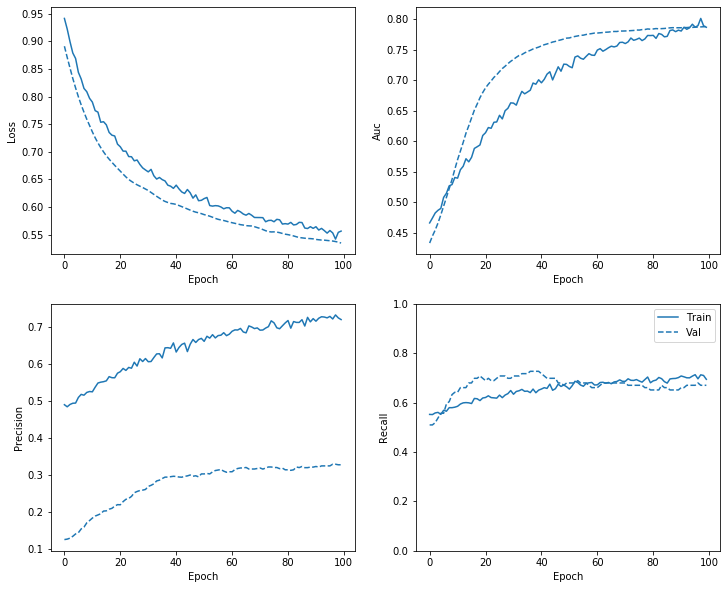

In [61]:
plot_metrics(resampled_history)

In [62]:
resampled_model_baseline = make_model_baseline()
resampled_model_baseline.load_weights(initial_weights_baseline)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model_baseline.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model_baseline.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))


Train for 20 steps, validate for 1 steps
Epoch 1/1000
20/20 [==============================] - 3s 132ms/step - loss: 0.8974 - tp: 11332.0000 - fp: 11685.0000 - tn: 8870.0000 - fn: 9073.0000 - accuracy: 0.4932 - precision: 0.4923 - recall: 0.5554 - auc: 0.4833 - val_loss: 0.8171 - val_tp: 59.0000 - val_fp: 359.0000 - val_tn: 223.0000 - val_fn: 47.0000 - val_accuracy: 0.4099 - val_precision: 0.1411 - val_recall: 0.5566 - val_auc: 0.4821
Epoch 2/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.8217 - tp: 11828.0000 - fp: 11046.0000 - tn: 9423.0000 - fn: 8663.0000 - accuracy: 0.5188 - precision: 0.5171 - recall: 0.5772 - auc: 0.5220 - val_loss: 0.7467 - val_tp: 68.0000 - val_fp: 312.0000 - val_tn: 270.0000 - val_fn: 38.0000 - val_accuracy: 0.4913 - val_precision: 0.1789 - val_recall: 0.6415 - val_auc: 0.5579
Epoch 3/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.7675 - tp: 12294.0000 - fp: 10329.0000 - tn: 10127.0000 - fn: 8210.0000 - accuracy: 0.54

20/20 [==============================] - 0s 24ms/step - loss: 0.5480 - tp: 14681.0000 - fp: 5399.0000 - tn: 14869.0000 - fn: 6011.0000 - accuracy: 0.7214 - precision: 0.7311 - recall: 0.7095 - auc: 0.7959 - val_loss: 0.5330 - val_tp: 72.0000 - val_fp: 146.0000 - val_tn: 436.0000 - val_fn: 34.0000 - val_accuracy: 0.7384 - val_precision: 0.3303 - val_recall: 0.6792 - val_auc: 0.7902
Epoch 22/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.5451 - tp: 14522.0000 - fp: 5414.0000 - tn: 15153.0000 - fn: 5871.0000 - accuracy: 0.7245 - precision: 0.7284 - recall: 0.7121 - auc: 0.7984 - val_loss: 0.5245 - val_tp: 70.0000 - val_fp: 142.0000 - val_tn: 440.0000 - val_fn: 36.0000 - val_accuracy: 0.7413 - val_precision: 0.3302 - val_recall: 0.6604 - val_auc: 0.7908
Epoch 23/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.5406 - tp: 14606.0000 - fp: 5229.0000 - tn: 15204.0000 - fn: 5921.0000 - accuracy: 0.7278 - precision: 0.7364 - recall: 0.7116 - auc: 0.8025

Epoch 42/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.5018 - tp: 15529.0000 - fp: 4975.0000 - tn: 15461.0000 - fn: 4995.0000 - accuracy: 0.7566 - precision: 0.7574 - recall: 0.7566 - auc: 0.8359 - val_loss: 0.4882 - val_tp: 73.0000 - val_fp: 134.0000 - val_tn: 448.0000 - val_fn: 33.0000 - val_accuracy: 0.7573 - val_precision: 0.3527 - val_recall: 0.6887 - val_auc: 0.8083
Epoch 43/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.5010 - tp: 15285.0000 - fp: 4981.0000 - tn: 15714.0000 - fn: 4980.0000 - accuracy: 0.7568 - precision: 0.7542 - recall: 0.7543 - auc: 0.8357 - val_loss: 0.4867 - val_tp: 73.0000 - val_fp: 133.0000 - val_tn: 449.0000 - val_fn: 33.0000 - val_accuracy: 0.7587 - val_precision: 0.3544 - val_recall: 0.6887 - val_auc: 0.8089
Epoch 44/1000
20/20 [==============================] - 0s 25ms/step - loss: 0.4998 - tp: 15498.0000 - fp: 4917.0000 - tn: 15575.0000 - fn: 4970.0000 - accuracy: 0.7586 - precision: 0.7591 - recall: 0.7572

Epoch 63/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.4816 - tp: 15806.0000 - fp: 4962.0000 - tn: 15496.0000 - fn: 4696.0000 - accuracy: 0.7642 - precision: 0.7611 - recall: 0.7709 - auc: 0.8482 - val_loss: 0.4649 - val_tp: 78.0000 - val_fp: 125.0000 - val_tn: 457.0000 - val_fn: 28.0000 - val_accuracy: 0.7776 - val_precision: 0.3842 - val_recall: 0.7358 - val_auc: 0.8234
Epoch 64/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.4767 - tp: 16064.0000 - fp: 4897.0000 - tn: 15440.0000 - fn: 4559.0000 - accuracy: 0.7691 - precision: 0.7664 - recall: 0.7789 - auc: 0.8519 - val_loss: 0.4657 - val_tp: 79.0000 - val_fp: 128.0000 - val_tn: 454.0000 - val_fn: 27.0000 - val_accuracy: 0.7747 - val_precision: 0.3816 - val_recall: 0.7453 - val_auc: 0.8242
Epoch 65/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.4763 - tp: 16100.0000 - fp: 4956.0000 - tn: 15403.0000 - fn: 4501.0000 - accuracy: 0.7691 - precision: 0.7646 - recall: 0.7815

Epoch 84/1000
20/20 [==============================] - 0s 23ms/step - loss: 0.4638 - tp: 15967.0000 - fp: 4913.0000 - tn: 15657.0000 - fn: 4423.0000 - accuracy: 0.7721 - precision: 0.7647 - recall: 0.7831 - auc: 0.8594 - val_loss: 0.4501 - val_tp: 77.0000 - val_fp: 128.0000 - val_tn: 454.0000 - val_fn: 29.0000 - val_accuracy: 0.7718 - val_precision: 0.3756 - val_recall: 0.7264 - val_auc: 0.8290
Epoch 85/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.4602 - tp: 16002.0000 - fp: 4835.0000 - tn: 15678.0000 - fn: 4445.0000 - accuracy: 0.7734 - precision: 0.7680 - recall: 0.7826 - auc: 0.8620 - val_loss: 0.4491 - val_tp: 78.0000 - val_fp: 128.0000 - val_tn: 454.0000 - val_fn: 28.0000 - val_accuracy: 0.7733 - val_precision: 0.3786 - val_recall: 0.7358 - val_auc: 0.8297
Epoch 86/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.4615 - tp: 15931.0000 - fp: 4924.0000 - tn: 15653.0000 - fn: 4452.0000 - accuracy: 0.7711 - precision: 0.7639 - recall: 0.7816

Epoch 105/1000
20/20 [==============================] - 0s 23ms/step - loss: 0.4497 - tp: 16317.0000 - fp: 4796.0000 - tn: 15647.0000 - fn: 4200.0000 - accuracy: 0.7804 - precision: 0.7728 - recall: 0.7953 - auc: 0.8680 - val_loss: 0.4371 - val_tp: 80.0000 - val_fp: 119.0000 - val_tn: 463.0000 - val_fn: 26.0000 - val_accuracy: 0.7892 - val_precision: 0.4020 - val_recall: 0.7547 - val_auc: 0.8356
Epoch 106/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.4474 - tp: 16286.0000 - fp: 4767.0000 - tn: 15694.0000 - fn: 4213.0000 - accuracy: 0.7808 - precision: 0.7736 - recall: 0.7945 - auc: 0.8695 - val_loss: 0.4373 - val_tp: 80.0000 - val_fp: 120.0000 - val_tn: 462.0000 - val_fn: 26.0000 - val_accuracy: 0.7878 - val_precision: 0.4000 - val_recall: 0.7547 - val_auc: 0.8360
Epoch 107/1000
20/20 [==============================] - 0s 23ms/step - loss: 0.4447 - tp: 16352.0000 - fp: 4710.0000 - tn: 15665.0000 - fn: 4233.0000 - accuracy: 0.7817 - precision: 0.7764 - recall: 0.7

20/20 [==============================] - 0s 24ms/step - loss: 0.4357 - tp: 16554.0000 - fp: 4586.0000 - tn: 15735.0000 - fn: 4085.0000 - accuracy: 0.7883 - precision: 0.7831 - recall: 0.8021 - auc: 0.8764 - val_loss: 0.4288 - val_tp: 78.0000 - val_fp: 113.0000 - val_tn: 469.0000 - val_fn: 28.0000 - val_accuracy: 0.7951 - val_precision: 0.4084 - val_recall: 0.7358 - val_auc: 0.8392
Epoch 126/1000
20/20 [==============================] - 0s 23ms/step - loss: 0.4335 - tp: 16518.0000 - fp: 4638.0000 - tn: 15788.0000 - fn: 4016.0000 - accuracy: 0.7887 - precision: 0.7808 - recall: 0.8044 - auc: 0.8775 - val_loss: 0.4261 - val_tp: 77.0000 - val_fp: 113.0000 - val_tn: 469.0000 - val_fn: 29.0000 - val_accuracy: 0.7936 - val_precision: 0.4053 - val_recall: 0.7264 - val_auc: 0.8391
Epoch 127/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.4321 - tp: 16271.0000 - fp: 4524.0000 - tn: 16119.0000 - fn: 4046.0000 - accuracy: 0.7908 - precision: 0.7824 - recall: 0.8009 - auc: 0.87

Epoch 146/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.4285 - tp: 16601.0000 - fp: 4449.0000 - tn: 15856.0000 - fn: 4054.0000 - accuracy: 0.7924 - precision: 0.7886 - recall: 0.8037 - auc: 0.8791 - val_loss: 0.4222 - val_tp: 78.0000 - val_fp: 109.0000 - val_tn: 473.0000 - val_fn: 28.0000 - val_accuracy: 0.8009 - val_precision: 0.4171 - val_recall: 0.7358 - val_auc: 0.8408
Epoch 147/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.4282 - tp: 16486.0000 - fp: 4534.0000 - tn: 15900.0000 - fn: 4040.0000 - accuracy: 0.7907 - precision: 0.7843 - recall: 0.8032 - auc: 0.8784 - val_loss: 0.4218 - val_tp: 78.0000 - val_fp: 109.0000 - val_tn: 473.0000 - val_fn: 28.0000 - val_accuracy: 0.8009 - val_precision: 0.4171 - val_recall: 0.7358 - val_auc: 0.8411
Epoch 148/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.4261 - tp: 16458.0000 - fp: 4411.0000 - tn: 16076.0000 - fn: 4015.0000 - accuracy: 0.7943 - precision: 0.7886 - recall: 0.8

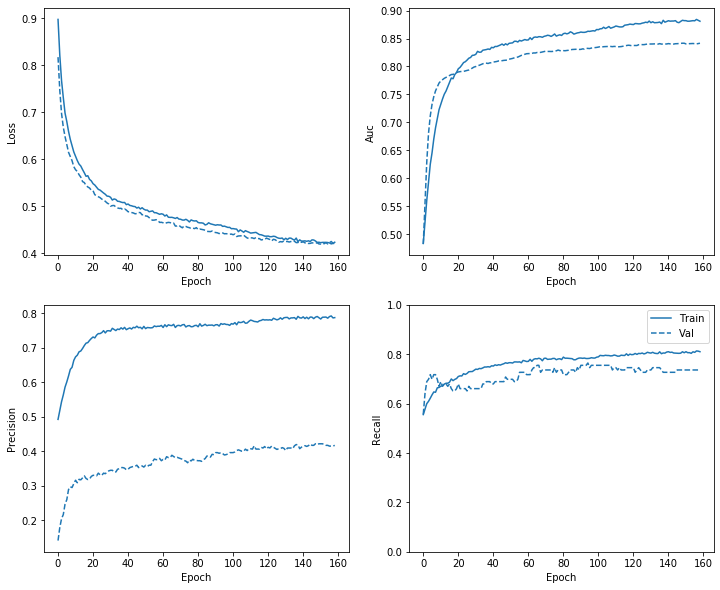

In [63]:
plot_metrics(resampled_history)


In [64]:
train_predictions_resampled = resampled_model_baseline.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model_baseline.predict(test_features, batch_size=BATCH_SIZE)


loss :  0.4208460748195648
tp :  99.0
fp :  143.0
tn :  590.0
fn :  28.0
accuracy :  0.8011628
precision :  0.4090909
recall :  0.77952754
auc :  0.84389466

Legitimate Transactions Detected (True Negatives):  590
Legitimate Transactions Incorrectly Detected (False Positives):  143
Fraudulent Transactions Missed (False Negatives):  28
Fraudulent Transactions Detected (True Positives):  99
Total Fraudulent Transactions:  127


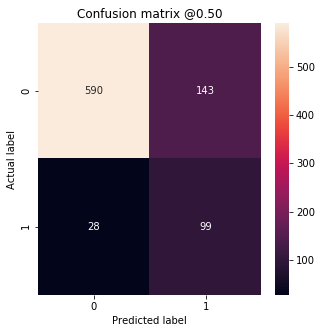

In [65]:
resampled_results = resampled_model_baseline.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model_baseline.metrics_names, resampled_results):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)


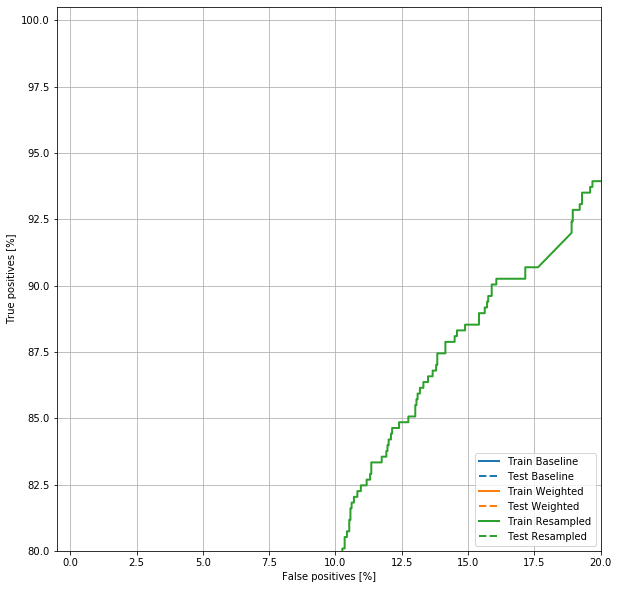

In [66]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')


### Modele elaboré

In [67]:
resampled_model_elab = make_model_elab()
resampled_model_elab.load_weights(initial_weights_elab)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model_elab.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model_elab.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train for 4.0 steps, validate for 1 steps
Epoch 1/100
4/4 [==============================] - 3s 722ms/step - loss: 0.6987 - tp: 1584.0000 - fp: 1608.0000 - tn: 2486.0000 - fn: 2514.0000 - accuracy: 0.4968 - precision: 0.4962 - recall: 0.3865 - auc: 0.4916 - val_loss: 0.6933 - val_tp: 58.0000 - val_fp: 300.0000 - val_tn: 282.0000 - val_fn: 48.0000 - val_accuracy: 0.4942 - val_precision: 0.1620 - val_recall: 0.5472 - val_auc: 0.5752
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 0.6920 - tp: 1953.0000 - fp: 1851.0000 - tn: 2291.0000 - fn: 2097.0000 - accuracy: 0.5181 - precision: 0.5134 - recall: 0.4822 - auc: 0.5279 - val_loss: 0.6945 - val_tp: 77.0000 - val_fp: 326.0000 - val_tn: 256.0000 - val_fn: 29.0000 - val_accuracy: 0.4840 - val_precision: 0.1911 - val_recall: 0.7264 - val_auc: 0.6611
Epoch 3/100
4/4 [==============================] - 0s 14ms/step - loss: 0.6846 - tp: 2252.0000 - fp: 1800.0000 - tn: 2322.0000 - fn: 1818.0000 - accuracy: 0.5583 - precision

Epoch 22/100
4/4 [==============================] - 0s 23ms/step - loss: 0.4041 - tp: 3516.0000 - fp: 843.0000 - tn: 3236.0000 - fn: 597.0000 - accuracy: 0.8242 - precision: 0.8066 - recall: 0.8549 - auc: 0.8975 - val_loss: 0.4172 - val_tp: 78.0000 - val_fp: 117.0000 - val_tn: 465.0000 - val_fn: 28.0000 - val_accuracy: 0.7892 - val_precision: 0.4000 - val_recall: 0.7358 - val_auc: 0.8486
Epoch 23/100
4/4 [==============================] - 0s 23ms/step - loss: 0.3952 - tp: 3498.0000 - fp: 774.0000 - tn: 3320.0000 - fn: 600.0000 - accuracy: 0.8323 - precision: 0.8188 - recall: 0.8536 - auc: 0.9014 - val_loss: 0.3893 - val_tp: 78.0000 - val_fp: 102.0000 - val_tn: 480.0000 - val_fn: 28.0000 - val_accuracy: 0.8110 - val_precision: 0.4333 - val_recall: 0.7358 - val_auc: 0.8583
Epoch 24/100
4/4 [==============================] - 0s 23ms/step - loss: 0.3733 - tp: 3553.0000 - fp: 725.0000 - tn: 3354.0000 - fn: 560.0000 - accuracy: 0.8431 - precision: 0.8305 - recall: 0.8638 - auc: 0.9124 - val_

Epoch 43/100
4/4 [==============================] - 0s 23ms/step - loss: 0.2033 - tp: 3872.0000 - fp: 376.0000 - tn: 3711.0000 - fn: 233.0000 - accuracy: 0.9257 - precision: 0.9115 - recall: 0.9432 - auc: 0.9721 - val_loss: 0.2605 - val_tp: 92.0000 - val_fp: 51.0000 - val_tn: 531.0000 - val_fn: 14.0000 - val_accuracy: 0.9055 - val_precision: 0.6434 - val_recall: 0.8679 - val_auc: 0.9336
Epoch 44/100
4/4 [==============================] - ETA: 0s - loss: 0.1978 - tp: 939.0000 - fp: 96.0000 - tn: 975.0000 - fn: 38.0000 - accuracy: 0.9346 - precision: 0.9072 - recall: 0.9611 - auc: 0.974 - 0s 23ms/step - loss: 0.1984 - tp: 3856.0000 - fp: 377.0000 - tn: 3744.0000 - fn: 215.0000 - accuracy: 0.9277 - precision: 0.9109 - recall: 0.9472 - auc: 0.9738 - val_loss: 0.2493 - val_tp: 93.0000 - val_fp: 47.0000 - val_tn: 535.0000 - val_fn: 13.0000 - val_accuracy: 0.9128 - val_precision: 0.6643 - val_recall: 0.8774 - val_auc: 0.9362
Epoch 45/100
4/4 [==============================] - 0s 23ms/step - l

Epoch 64/100
4/4 [==============================] - 0s 23ms/step - loss: 0.1162 - tp: 3981.0000 - fp: 174.0000 - tn: 3866.0000 - fn: 171.0000 - accuracy: 0.9579 - precision: 0.9581 - recall: 0.9588 - auc: 0.9911 - val_loss: 0.1986 - val_tp: 94.0000 - val_fp: 20.0000 - val_tn: 562.0000 - val_fn: 12.0000 - val_accuracy: 0.9535 - val_precision: 0.8246 - val_recall: 0.8868 - val_auc: 0.9448
Epoch 65/100
4/4 [==============================] - ETA: 0s - loss: 0.1247 - tp: 959.0000 - fp: 57.0000 - tn: 1005.0000 - fn: 27.0000 - accuracy: 0.9590 - precision: 0.9439 - recall: 0.9726 - auc: 0.98 - 0s 24ms/step - loss: 0.1181 - tp: 3985.0000 - fp: 208.0000 - tn: 3880.0000 - fn: 119.0000 - accuracy: 0.9601 - precision: 0.9504 - recall: 0.9710 - auc: 0.9901 - val_loss: 0.2025 - val_tp: 95.0000 - val_fp: 23.0000 - val_tn: 559.0000 - val_fn: 11.0000 - val_accuracy: 0.9506 - val_precision: 0.8051 - val_recall: 0.8962 - val_auc: 0.9446
Epoch 66/100
4/4 [==============================] - 0s 24ms/step - l

Epoch 85/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0851 - tp: 4037.0000 - fp: 142.0000 - tn: 3925.0000 - fn: 88.0000 - accuracy: 0.9719 - precision: 0.9660 - recall: 0.9787 - auc: 0.9942 - val_loss: 0.1751 - val_tp: 95.0000 - val_fp: 9.0000 - val_tn: 573.0000 - val_fn: 11.0000 - val_accuracy: 0.9709 - val_precision: 0.9135 - val_recall: 0.8962 - val_auc: 0.9506
Epoch 86/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0865 - tp: 4058.0000 - fp: 127.0000 - tn: 3905.0000 - fn: 102.0000 - accuracy: 0.9720 - precision: 0.9697 - recall: 0.9755 - auc: 0.9943 - val_loss: 0.1775 - val_tp: 94.0000 - val_fp: 9.0000 - val_tn: 573.0000 - val_fn: 12.0000 - val_accuracy: 0.9695 - val_precision: 0.9126 - val_recall: 0.8868 - val_auc: 0.9510
Epoch 87/100
4/4 [==============================] - 0s 24ms/step - loss: 0.0732 - tp: 3890.0000 - fp: 105.0000 - tn: 4105.0000 - fn: 92.0000 - accuracy: 0.9760 - precision: 0.9737 - recall: 0.9769 - auc: 0.9960 - val_loss: 

In [68]:
resampled_model_elab = make_model_elab()
resampled_model_elab.load_weights(initial_weights_elab)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model_elab.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model_elab.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Train for 20 steps, validate for 1 steps
Epoch 1/1000
20/20 [==============================] - 3s 140ms/step - loss: 0.6807 - tp: 11267.0000 - fp: 8703.0000 - tn: 11852.0000 - fn: 9138.0000 - accuracy: 0.5644 - precision: 0.5642 - recall: 0.5522 - auc: 0.5897 - val_loss: 0.6700 - val_tp: 72.0000 - val_fp: 211.0000 - val_tn: 371.0000 - val_fn: 34.0000 - val_accuracy: 0.6439 - val_precision: 0.2544 - val_recall: 0.6792 - val_auc: 0.7252
Epoch 2/1000
20/20 [==============================] - 0s 9ms/step - loss: 0.6125 - tp: 12985.0000 - fp: 5887.0000 - tn: 14582.0000 - fn: 7506.0000 - accuracy: 0.6730 - precision: 0.6881 - recall: 0.6337 - auc: 0.7301 - val_loss: 0.5644 - val_tp: 67.0000 - val_fp: 159.0000 - val_tn: 423.0000 - val_fn: 39.0000 - val_accuracy: 0.7122 - val_precision: 0.2965 - val_recall: 0.6321 - val_auc: 0.7616
Epoch 3/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.5325 - tp: 14756.0000 - fp: 5061.0000 - tn: 15395.0000 - fn: 5748.0000 - accuracy: 0.736

20/20 [==============================] - 0s 23ms/step - loss: 0.0628 - tp: 20309.0000 - fp: 436.0000 - tn: 19832.0000 - fn: 383.0000 - accuracy: 0.9800 - precision: 0.9790 - recall: 0.9815 - auc: 0.9967 - val_loss: 0.1881 - val_tp: 94.0000 - val_fp: 10.0000 - val_tn: 572.0000 - val_fn: 12.0000 - val_accuracy: 0.9680 - val_precision: 0.9038 - val_recall: 0.8868 - val_auc: 0.9467
Epoch 22/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.0608 - tp: 20012.0000 - fp: 424.0000 - tn: 20143.0000 - fn: 381.0000 - accuracy: 0.9803 - precision: 0.9793 - recall: 0.9813 - auc: 0.9969 - val_loss: 0.1939 - val_tp: 94.0000 - val_fp: 10.0000 - val_tn: 572.0000 - val_fn: 12.0000 - val_accuracy: 0.9680 - val_precision: 0.9038 - val_recall: 0.8868 - val_auc: 0.9469
Epoch 23/1000
20/20 [==============================] - 0s 23ms/step - loss: 0.0589 - tp: 20162.0000 - fp: 378.0000 - tn: 20055.0000 - fn: 365.0000 - accuracy: 0.9819 - precision: 0.9816 - recall: 0.9822 - auc: 0.9969 - val_l

Epoch 42/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.0265 - tp: 20356.0000 - fp: 153.0000 - tn: 20283.0000 - fn: 168.0000 - accuracy: 0.9922 - precision: 0.9925 - recall: 0.9918 - auc: 0.9992 - val_loss: 0.2568 - val_tp: 92.0000 - val_fp: 8.0000 - val_tn: 574.0000 - val_fn: 14.0000 - val_accuracy: 0.9680 - val_precision: 0.9200 - val_recall: 0.8679 - val_auc: 0.9526
Epoch 43/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.0273 - tp: 20107.0000 - fp: 174.0000 - tn: 20521.0000 - fn: 158.0000 - accuracy: 0.9919 - precision: 0.9914 - recall: 0.9922 - auc: 0.9991 - val_loss: 0.2573 - val_tp: 92.0000 - val_fp: 8.0000 - val_tn: 574.0000 - val_fn: 14.0000 - val_accuracy: 0.9680 - val_precision: 0.9200 - val_recall: 0.8679 - val_auc: 0.9501
Epoch 44/1000
20/20 [==============================] - 0s 23ms/step - loss: 0.0267 - tp: 20307.0000 - fp: 170.0000 - tn: 20322.0000 - fn: 161.0000 - accuracy: 0.9919 - precision: 0.9917 - recall: 0.9921 - auc: 0.

loss :  0.19581615924835205
tp :  112.0
fp :  2.0
tn :  731.0
fn :  15.0
accuracy :  0.98023254
precision :  0.98245615
recall :  0.88188976
auc :  0.9488833

Legitimate Transactions Detected (True Negatives):  731
Legitimate Transactions Incorrectly Detected (False Positives):  2
Fraudulent Transactions Missed (False Negatives):  15
Fraudulent Transactions Detected (True Positives):  112
Total Fraudulent Transactions:  127


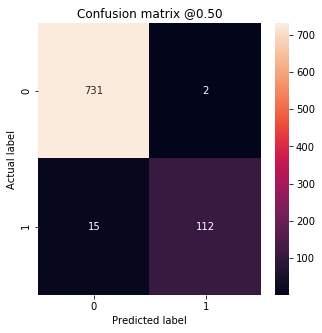

In [69]:
train_predictions_resampled_elab = resampled_model_elab.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled_elab = resampled_model_elab.predict(test_features, batch_size=BATCH_SIZE)
resampled_results_elab = resampled_model_elab.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model_elab.metrics_names, resampled_results_elab):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled_elab)


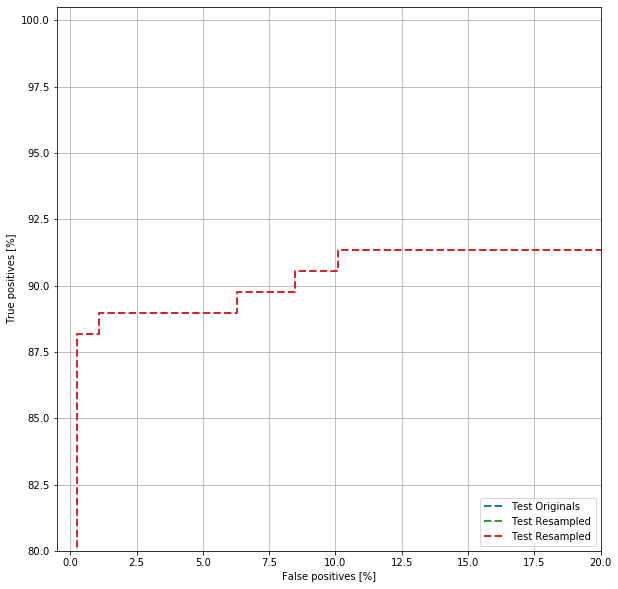

In [70]:

plot_roc("Test Originals", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')


plot_roc("Test Resampled", test_labels, test_predictions_resampled_elab, color=colors[3], linestyle='--')
plt.legend(loc='lower right')

### SMOTE

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
train_features_SMOTE, train_labels_SMOTE = SMOTE().fit_sample(train_features, train_labels)

In [73]:
smote_model_baseline = make_model_baseline()
smote_model_baseline.load_weights(initial_weights_baseline)

# Reset the bias to zero, since this dataset is balanced.
output_layer = smote_model_baseline.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = smote_model_baseline.fit(
    train_features_SMOTE,
    train_labels_SMOTE,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 4580 samples, validate for 1 steps
Epoch 1/100
4580/4580 [==============================] - 3s 713us/sample - loss: 0.8098 - tp: 1325.0000 - fp: 1217.0000 - tn: 1073.0000 - fn: 965.0000 - accuracy: 0.5236 - precision: 0.5212 - recall: 0.5786 - auc: 0.5286 - val_loss: 0.6913 - val_tp: 65.0000 - val_fp: 281.0000 - val_tn: 301.0000 - val_fn: 41.0000 - val_accuracy: 0.5320 - val_precision: 0.1879 - val_recall: 0.6132 - val_auc: 0.6345
Epoch 2/100
4580/4580 [==============================] - 1s 142us/sample - loss: 0.6944 - tp: 1455.0000 - fp: 1053.0000 - tn: 1237.0000 - fn: 835.0000 - accuracy: 0.5878 - precision: 0.5801 - recall: 0.6354 - auc: 0.6282 - val_loss: 0.6276 - val_tp: 71.0000 - val_fp: 214.0000 - val_tn: 368.0000 - val_fn: 35.0000 - val_accuracy: 0.6381 - val_precision: 0.2491 - val_recall: 0.6698 - val_auc: 0.7108
Epoch 3/100
4580/4580 [==============================] - 1s 143us/sample - loss: 0.6384 - tp: 1461.0000 - fp: 817.0000 - tn: 1473.0000 - fn: 829.0000 - accu

4580/4580 [==============================] - 1s 144us/sample - loss: 0.4918 - tp: 1759.0000 - fp: 552.0000 - tn: 1738.0000 - fn: 531.0000 - accuracy: 0.7635 - precision: 0.7611 - recall: 0.7681 - auc: 0.8424 - val_loss: 0.4879 - val_tp: 66.0000 - val_fp: 133.0000 - val_tn: 449.0000 - val_fn: 40.0000 - val_accuracy: 0.7485 - val_precision: 0.3317 - val_recall: 0.6226 - val_auc: 0.7796
Epoch 22/100
4580/4580 [==============================] - 1s 142us/sample - loss: 0.4877 - tp: 1744.0000 - fp: 527.0000 - tn: 1763.0000 - fn: 546.0000 - accuracy: 0.7657 - precision: 0.7679 - recall: 0.7616 - auc: 0.8453 - val_loss: 0.4994 - val_tp: 68.0000 - val_fp: 135.0000 - val_tn: 447.0000 - val_fn: 38.0000 - val_accuracy: 0.7485 - val_precision: 0.3350 - val_recall: 0.6415 - val_auc: 0.7825
Epoch 23/100
4580/4580 [==============================] - 1s 147us/sample - loss: 0.4883 - tp: 1769.0000 - fp: 568.0000 - tn: 1722.0000 - fn: 521.0000 - accuracy: 0.7622 - precision: 0.7570 - recall: 0.7725 - auc:

4580/4580 [==============================] - 1s 143us/sample - loss: 0.4520 - tp: 1942.0000 - fp: 641.0000 - tn: 1649.0000 - fn: 348.0000 - accuracy: 0.7841 - precision: 0.7518 - recall: 0.8480 - auc: 0.8683 - val_loss: 0.4624 - val_tp: 74.0000 - val_fp: 127.0000 - val_tn: 455.0000 - val_fn: 32.0000 - val_accuracy: 0.7689 - val_precision: 0.3682 - val_recall: 0.6981 - val_auc: 0.7918
Epoch 42/100
4580/4580 [==============================] - 1s 143us/sample - loss: 0.4620 - tp: 1922.0000 - fp: 689.0000 - tn: 1601.0000 - fn: 368.0000 - accuracy: 0.7692 - precision: 0.7361 - recall: 0.8393 - auc: 0.8584 - val_loss: 0.4575 - val_tp: 73.0000 - val_fp: 123.0000 - val_tn: 459.0000 - val_fn: 33.0000 - val_accuracy: 0.7733 - val_precision: 0.3724 - val_recall: 0.6887 - val_auc: 0.7944
Epoch 43/100
4580/4580 [==============================] - 1s 143us/sample - loss: 0.4604 - tp: 1938.0000 - fp: 685.0000 - tn: 1605.0000 - fn: 352.0000 - accuracy: 0.7736 - precision: 0.7388 - recall: 0.8463 - auc:

4580/4580 [==============================] - 1s 144us/sample - loss: 0.4279 - tp: 2020.0000 - fp: 679.0000 - tn: 1611.0000 - fn: 270.0000 - accuracy: 0.7928 - precision: 0.7484 - recall: 0.8821 - auc: 0.8820 - val_loss: 0.4472 - val_tp: 72.0000 - val_fp: 119.0000 - val_tn: 463.0000 - val_fn: 34.0000 - val_accuracy: 0.7776 - val_precision: 0.3770 - val_recall: 0.6792 - val_auc: 0.8057
Epoch 62/100
4580/4580 [==============================] - 1s 144us/sample - loss: 0.4397 - tp: 2013.0000 - fp: 696.0000 - tn: 1594.0000 - fn: 277.0000 - accuracy: 0.7876 - precision: 0.7431 - recall: 0.8790 - auc: 0.8734 - val_loss: 0.4487 - val_tp: 76.0000 - val_fp: 119.0000 - val_tn: 463.0000 - val_fn: 30.0000 - val_accuracy: 0.7834 - val_precision: 0.3897 - val_recall: 0.7170 - val_auc: 0.8057
Epoch 63/100
4580/4580 [==============================] - 1s 144us/sample - loss: 0.4365 - tp: 2020.0000 - fp: 697.0000 - tn: 1593.0000 - fn: 270.0000 - accuracy: 0.7889 - precision: 0.7435 - recall: 0.8821 - auc:

4580/4580 [==============================] - 1s 143us/sample - loss: 0.4275 - tp: 2044.0000 - fp: 712.0000 - tn: 1578.0000 - fn: 246.0000 - accuracy: 0.7908 - precision: 0.7417 - recall: 0.8926 - auc: 0.8801 - val_loss: 0.4378 - val_tp: 72.0000 - val_fp: 121.0000 - val_tn: 461.0000 - val_fn: 34.0000 - val_accuracy: 0.7747 - val_precision: 0.3731 - val_recall: 0.6792 - val_auc: 0.8095
Epoch 82/100
4580/4580 [==============================] - 1s 143us/sample - loss: 0.4227 - tp: 2062.0000 - fp: 738.0000 - tn: 1552.0000 - fn: 228.0000 - accuracy: 0.7891 - precision: 0.7364 - recall: 0.9004 - auc: 0.8832 - val_loss: 0.4407 - val_tp: 74.0000 - val_fp: 122.0000 - val_tn: 460.0000 - val_fn: 32.0000 - val_accuracy: 0.7762 - val_precision: 0.3776 - val_recall: 0.6981 - val_auc: 0.8105
Epoch 00082: early stopping


loss :  0.43708062171936035
tp :  86.0
fp :  146.0
tn :  587.0
fn :  41.0
accuracy :  0.78255814
precision :  0.37068966
recall :  0.6771653
auc :  0.814069

Legitimate Transactions Detected (True Negatives):  587
Legitimate Transactions Incorrectly Detected (False Positives):  146
Fraudulent Transactions Missed (False Negatives):  41
Fraudulent Transactions Detected (True Positives):  86
Total Fraudulent Transactions:  127


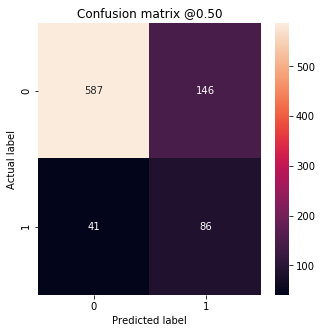

In [74]:
train_predictions_smote_baseline = smote_model_baseline.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_smote_baseline = smote_model_baseline.predict(test_features, batch_size=BATCH_SIZE)
smote_results_baseline = smote_model_baseline.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(smote_model_baseline.metrics_names, smote_results_baseline):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_smote_baseline)

### modele elaboré

In [75]:
smote_model_elab = make_model_elab()
smote_model_elab.load_weights(initial_weights_elab)

# Reset the bias to zero, since this dataset is balanced.
output_layer = smote_model_baseline.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = smote_model_elab.fit(
    train_features_SMOTE,
    train_labels_SMOTE,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 4580 samples, validate for 1 steps
Epoch 1/100
4580/4580 [==============================] - 3s 658us/sample - loss: 0.6504 - tp: 1056.0000 - fp: 543.0000 - tn: 1747.0000 - fn: 1234.0000 - accuracy: 0.6120 - precision: 0.6604 - recall: 0.4611 - auc: 0.6592 - val_loss: 0.4856 - val_tp: 58.0000 - val_fp: 93.0000 - val_tn: 489.0000 - val_fn: 48.0000 - val_accuracy: 0.7951 - val_precision: 0.3841 - val_recall: 0.5472 - val_auc: 0.7452
Epoch 2/100
4580/4580 [==============================] - 1s 160us/sample - loss: 0.5452 - tp: 1507.0000 - fp: 460.0000 - tn: 1830.0000 - fn: 783.0000 - accuracy: 0.7286 - precision: 0.7661 - recall: 0.6581 - auc: 0.8047 - val_loss: 0.5282 - val_tp: 69.0000 - val_fp: 135.0000 - val_tn: 447.0000 - val_fn: 37.0000 - val_accuracy: 0.7500 - val_precision: 0.3382 - val_recall: 0.6509 - val_auc: 0.7756
Epoch 3/100
4580/4580 [==============================] - 1s 164us/sample - loss: 0.4695 - tp: 1775.0000 - fp: 466.0000 - tn: 1824.0000 - fn: 515.0000 - accura

4580/4580 [==============================] - 1s 163us/sample - loss: 0.0939 - tp: 2225.0000 - fp: 83.0000 - tn: 2207.0000 - fn: 65.0000 - accuracy: 0.9677 - precision: 0.9640 - recall: 0.9716 - auc: 0.9936 - val_loss: 0.2583 - val_tp: 87.0000 - val_fp: 15.0000 - val_tn: 567.0000 - val_fn: 19.0000 - val_accuracy: 0.9506 - val_precision: 0.8529 - val_recall: 0.8208 - val_auc: 0.9330
Epoch 22/100
4580/4580 [==============================] - 1s 162us/sample - loss: 0.0897 - tp: 2230.0000 - fp: 63.0000 - tn: 2227.0000 - fn: 60.0000 - accuracy: 0.9731 - precision: 0.9725 - recall: 0.9738 - auc: 0.9940 - val_loss: 0.2410 - val_tp: 90.0000 - val_fp: 15.0000 - val_tn: 567.0000 - val_fn: 16.0000 - val_accuracy: 0.9549 - val_precision: 0.8571 - val_recall: 0.8491 - val_auc: 0.9251
Epoch 23/100
4580/4580 [==============================] - 1s 160us/sample - loss: 0.0954 - tp: 2210.0000 - fp: 79.0000 - tn: 2211.0000 - fn: 80.0000 - accuracy: 0.9653 - precision: 0.9655 - recall: 0.9651 - auc: 0.9938 

Epoch 42/100
4580/4580 [==============================] - 1s 161us/sample - loss: 0.0572 - tp: 2256.0000 - fp: 36.0000 - tn: 2254.0000 - fn: 34.0000 - accuracy: 0.9847 - precision: 0.9843 - recall: 0.9852 - auc: 0.9967 - val_loss: 0.2543 - val_tp: 93.0000 - val_fp: 7.0000 - val_tn: 575.0000 - val_fn: 13.0000 - val_accuracy: 0.9709 - val_precision: 0.9300 - val_recall: 0.8774 - val_auc: 0.9394
Epoch 43/100
4580/4580 [==============================] - 1s 161us/sample - loss: 0.0474 - tp: 2250.0000 - fp: 40.0000 - tn: 2250.0000 - fn: 40.0000 - accuracy: 0.9825 - precision: 0.9825 - recall: 0.9825 - auc: 0.9984 - val_loss: 0.2444 - val_tp: 93.0000 - val_fp: 8.0000 - val_tn: 574.0000 - val_fn: 13.0000 - val_accuracy: 0.9695 - val_precision: 0.9208 - val_recall: 0.8774 - val_auc: 0.9457
Epoch 44/100
4580/4580 [==============================] - 1s 162us/sample - loss: 0.0433 - tp: 2265.0000 - fp: 30.0000 - tn: 2260.0000 - fn: 25.0000 - accuracy: 0.9880 - precision: 0.9869 - recall: 0.9891 - a

loss :  0.21661555767059326
tp :  112.0
fp :  5.0
tn :  728.0
fn :  15.0
accuracy :  0.9767442
precision :  0.95726496
recall :  0.88188976
auc :  0.94213724

Legitimate Transactions Detected (True Negatives):  728
Legitimate Transactions Incorrectly Detected (False Positives):  5
Fraudulent Transactions Missed (False Negatives):  15
Fraudulent Transactions Detected (True Positives):  112
Total Fraudulent Transactions:  127


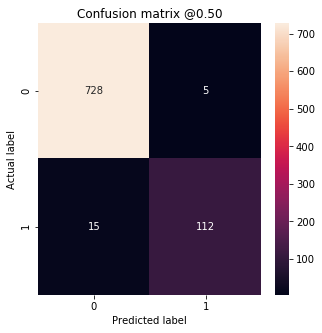

In [76]:
train_predictions_smote_elab = smote_model_elab.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_smote_elab = smote_model_elab.predict(test_features, batch_size=BATCH_SIZE)
smote_results_elab = smote_model_elab.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(smote_model_elab.metrics_names, smote_results_elab):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_smote_elab)

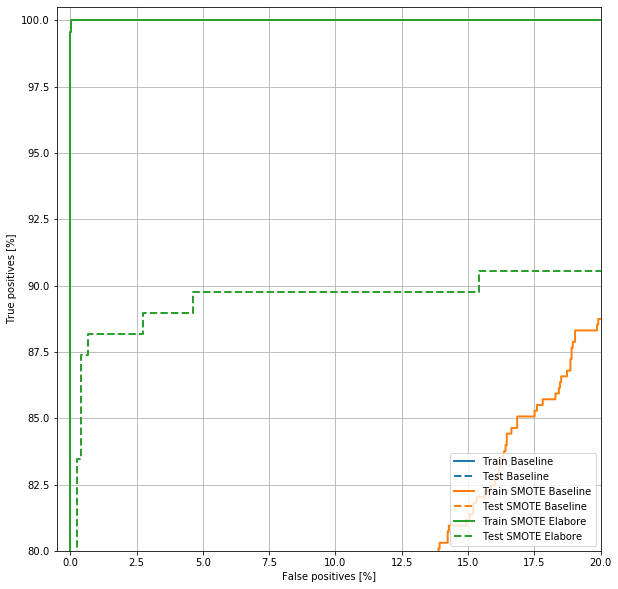

In [77]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train SMOTE Baseline", train_labels, train_predictions_smote_baseline, color=colors[1])
plot_roc("Test SMOTE Baseline", test_labels, test_predictions_smote_baseline, color=colors[1], linestyle='--')

plot_roc("Train SMOTE Elabore", train_labels, train_predictions_smote_elab, color=colors[2])
plot_roc("Test SMOTE Elabore", test_labels, test_predictions_smote_elab, color=colors[2], linestyle='--')


plt.legend(loc='lower right')

### ADASYN (Adaptive Synthetic)

In [78]:
from imblearn.over_sampling import ADASYN 
ada = ADASYN(random_state=42)
train_features_ADASYN, train_labels_ADASYN = ada.fit_resample(train_features, train_labels)

In [79]:
adasyn_model_baseline = make_model_baseline()
adasyn_model_baseline.load_weights(initial_weights_baseline)

# Reset the bias to zero, since this dataset is balanced.
output_layer = adasyn_model_baseline.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = adasyn_model_baseline.fit(
    train_features_ADASYN,
    train_labels_ADASYN,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 4597 samples, validate for 1 steps
Epoch 1/100
4597/4597 [==============================] - 3s 587us/sample - loss: 0.8194 - tp: 1326.0000 - fp: 1264.0000 - tn: 1026.0000 - fn: 981.0000 - accuracy: 0.5116 - precision: 0.5120 - recall: 0.5748 - auc: 0.5116 - val_loss: 0.6951 - val_tp: 67.0000 - val_fp: 283.0000 - val_tn: 299.0000 - val_fn: 39.0000 - val_accuracy: 0.5320 - val_precision: 0.1914 - val_recall: 0.6321 - val_auc: 0.6212
Epoch 2/100
4597/4597 [==============================] - 1s 143us/sample - loss: 0.7156 - tp: 1354.0000 - fp: 1037.0000 - tn: 1253.0000 - fn: 953.0000 - accuracy: 0.5671 - precision: 0.5663 - recall: 0.5869 - auc: 0.5959 - val_loss: 0.6328 - val_tp: 71.0000 - val_fp: 206.0000 - val_tn: 376.0000 - val_fn: 35.0000 - val_accuracy: 0.6497 - val_precision: 0.2563 - val_recall: 0.6698 - val_auc: 0.7089
Epoch 3/100
4597/4597 [==============================] - 1s 140us/sample - loss: 0.6653 - tp: 1428.0000 - fp: 885.0000 - tn: 1405.0000 - fn: 879.0000 - accu

4597/4597 [==============================] - 1s 142us/sample - loss: 0.5067 - tp: 1814.0000 - fp: 682.0000 - tn: 1608.0000 - fn: 493.0000 - accuracy: 0.7444 - precision: 0.7268 - recall: 0.7863 - auc: 0.8271 - val_loss: 0.4876 - val_tp: 65.0000 - val_fp: 133.0000 - val_tn: 449.0000 - val_fn: 41.0000 - val_accuracy: 0.7471 - val_precision: 0.3283 - val_recall: 0.6132 - val_auc: 0.7839
Epoch 22/100
4597/4597 [==============================] - 1s 155us/sample - loss: 0.4953 - tp: 1820.0000 - fp: 662.0000 - tn: 1628.0000 - fn: 487.0000 - accuracy: 0.7501 - precision: 0.7333 - recall: 0.7889 - auc: 0.8374 - val_loss: 0.4902 - val_tp: 65.0000 - val_fp: 140.0000 - val_tn: 442.0000 - val_fn: 41.0000 - val_accuracy: 0.7369 - val_precision: 0.3171 - val_recall: 0.6132 - val_auc: 0.7870
Epoch 23/100
4597/4597 [==============================] - 1s 140us/sample - loss: 0.4918 - tp: 1874.0000 - fp: 663.0000 - tn: 1627.0000 - fn: 433.0000 - accuracy: 0.7616 - precision: 0.7387 - recall: 0.8123 - auc:

4597/4597 [==============================] - 1s 142us/sample - loss: 0.4655 - tp: 1975.0000 - fp: 690.0000 - tn: 1600.0000 - fn: 332.0000 - accuracy: 0.7777 - precision: 0.7411 - recall: 0.8561 - auc: 0.8539 - val_loss: 0.4654 - val_tp: 74.0000 - val_fp: 134.0000 - val_tn: 448.0000 - val_fn: 32.0000 - val_accuracy: 0.7587 - val_precision: 0.3558 - val_recall: 0.6981 - val_auc: 0.8030
Epoch 42/100
4597/4597 [==============================] - 1s 140us/sample - loss: 0.4629 - tp: 1999.0000 - fp: 691.0000 - tn: 1599.0000 - fn: 308.0000 - accuracy: 0.7827 - precision: 0.7431 - recall: 0.8665 - auc: 0.8549 - val_loss: 0.4649 - val_tp: 73.0000 - val_fp: 133.0000 - val_tn: 449.0000 - val_fn: 33.0000 - val_accuracy: 0.7587 - val_precision: 0.3544 - val_recall: 0.6887 - val_auc: 0.8028
Epoch 43/100
4597/4597 [==============================] - 1s 141us/sample - loss: 0.4612 - tp: 1983.0000 - fp: 703.0000 - tn: 1587.0000 - fn: 324.0000 - accuracy: 0.7766 - precision: 0.7383 - recall: 0.8596 - auc:

4597/4597 [==============================] - 1s 143us/sample - loss: 0.4351 - tp: 2051.0000 - fp: 691.0000 - tn: 1599.0000 - fn: 256.0000 - accuracy: 0.7940 - precision: 0.7480 - recall: 0.8890 - auc: 0.8733 - val_loss: 0.4468 - val_tp: 75.0000 - val_fp: 132.0000 - val_tn: 450.0000 - val_fn: 31.0000 - val_accuracy: 0.7631 - val_precision: 0.3623 - val_recall: 0.7075 - val_auc: 0.8117
Epoch 62/100
4597/4597 [==============================] - 1s 142us/sample - loss: 0.4404 - tp: 2063.0000 - fp: 711.0000 - tn: 1579.0000 - fn: 244.0000 - accuracy: 0.7923 - precision: 0.7437 - recall: 0.8942 - auc: 0.8667 - val_loss: 0.4437 - val_tp: 75.0000 - val_fp: 131.0000 - val_tn: 451.0000 - val_fn: 31.0000 - val_accuracy: 0.7645 - val_precision: 0.3641 - val_recall: 0.7075 - val_auc: 0.8112
Epoch 63/100
4597/4597 [==============================] - 1s 143us/sample - loss: 0.4398 - tp: 2073.0000 - fp: 706.0000 - tn: 1584.0000 - fn: 234.0000 - accuracy: 0.7955 - precision: 0.7460 - recall: 0.8986 - auc:

4597/4597 [==============================] - 1s 142us/sample - loss: 0.4292 - tp: 2089.0000 - fp: 737.0000 - tn: 1553.0000 - fn: 218.0000 - accuracy: 0.7923 - precision: 0.7392 - recall: 0.9055 - auc: 0.8739 - val_loss: 0.4331 - val_tp: 74.0000 - val_fp: 125.0000 - val_tn: 457.0000 - val_fn: 32.0000 - val_accuracy: 0.7718 - val_precision: 0.3719 - val_recall: 0.6981 - val_auc: 0.8159
Epoch 82/100
4597/4597 [==============================] - 1s 141us/sample - loss: 0.4294 - tp: 2092.0000 - fp: 734.0000 - tn: 1556.0000 - fn: 215.0000 - accuracy: 0.7936 - precision: 0.7403 - recall: 0.9068 - auc: 0.8726 - val_loss: 0.4270 - val_tp: 76.0000 - val_fp: 123.0000 - val_tn: 459.0000 - val_fn: 30.0000 - val_accuracy: 0.7776 - val_precision: 0.3819 - val_recall: 0.7170 - val_auc: 0.8168
Epoch 83/100
4597/4597 [==============================] - 1s 142us/sample - loss: 0.4252 - tp: 2087.0000 - fp: 673.0000 - tn: 1617.0000 - fn: 220.0000 - accuracy: 0.8057 - precision: 0.7562 - recall: 0.9046 - auc:

loss :  0.4249444603919983
tp :  90.0
fp :  142.0
tn :  591.0
fn :  37.0
accuracy :  0.79186046
precision :  0.38793105
recall :  0.70866144
auc :  0.82323205

Legitimate Transactions Detected (True Negatives):  591
Legitimate Transactions Incorrectly Detected (False Positives):  142
Fraudulent Transactions Missed (False Negatives):  37
Fraudulent Transactions Detected (True Positives):  90
Total Fraudulent Transactions:  127


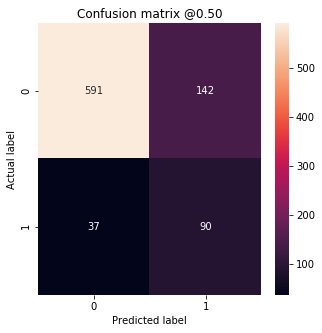

In [80]:
train_predictions_adasyn_baseline = adasyn_model_baseline.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_adasyn_baseline = adasyn_model_baseline.predict(test_features, batch_size=BATCH_SIZE)
adasyn_results_baseline = adasyn_model_baseline.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(adasyn_model_baseline.metrics_names, adasyn_results_baseline):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_adasyn_baseline)

## Modele Elaboré

In [81]:
adasyn_model_elab = make_model_elab()
adasyn_model_elab.load_weights(initial_weights_elab)

# Reset the bias to zero, since this dataset is balanced.
output_layer = adasyn_model_elab.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = adasyn_model_elab.fit(
    train_features_ADASYN,
    train_labels_ADASYN,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 4597 samples, validate for 1 steps
Epoch 1/100
4597/4597 [==============================] - 3s 661us/sample - loss: 0.6696 - tp: 1286.0000 - fp: 965.0000 - tn: 1325.0000 - fn: 1021.0000 - accuracy: 0.5680 - precision: 0.5713 - recall: 0.5574 - auc: 0.6135 - val_loss: 0.6019 - val_tp: 67.0000 - val_fp: 177.0000 - val_tn: 405.0000 - val_fn: 39.0000 - val_accuracy: 0.6860 - val_precision: 0.2746 - val_recall: 0.6321 - val_auc: 0.7592
Epoch 2/100
4597/4597 [==============================] - 1s 166us/sample - loss: 0.5482 - tp: 1641.0000 - fp: 569.0000 - tn: 1721.0000 - fn: 666.0000 - accuracy: 0.7313 - precision: 0.7425 - recall: 0.7113 - auc: 0.7987 - val_loss: 0.4655 - val_tp: 67.0000 - val_fp: 119.0000 - val_tn: 463.0000 - val_fn: 39.0000 - val_accuracy: 0.7703 - val_precision: 0.3602 - val_recall: 0.6321 - val_auc: 0.7850
Epoch 3/100
4597/4597 [==============================] - 1s 163us/sample - loss: 0.4718 - tp: 1837.0000 - fp: 526.0000 - tn: 1764.0000 - fn: 470.0000 - accur

4597/4597 [==============================] - 1s 163us/sample - loss: 0.1049 - tp: 2237.0000 - fp: 101.0000 - tn: 2189.0000 - fn: 70.0000 - accuracy: 0.9628 - precision: 0.9568 - recall: 0.9697 - auc: 0.9924 - val_loss: 0.2290 - val_tp: 91.0000 - val_fp: 8.0000 - val_tn: 574.0000 - val_fn: 15.0000 - val_accuracy: 0.9666 - val_precision: 0.9192 - val_recall: 0.8585 - val_auc: 0.9381
Epoch 22/100
4597/4597 [==============================] - 1s 161us/sample - loss: 0.0860 - tp: 2243.0000 - fp: 72.0000 - tn: 2218.0000 - fn: 64.0000 - accuracy: 0.9704 - precision: 0.9689 - recall: 0.9723 - auc: 0.9945 - val_loss: 0.2090 - val_tp: 92.0000 - val_fp: 9.0000 - val_tn: 573.0000 - val_fn: 14.0000 - val_accuracy: 0.9666 - val_precision: 0.9109 - val_recall: 0.8679 - val_auc: 0.9355
Epoch 23/100
4597/4597 [==============================] - 1s 163us/sample - loss: 0.0909 - tp: 2246.0000 - fp: 73.0000 - tn: 2217.0000 - fn: 61.0000 - accuracy: 0.9709 - precision: 0.9685 - recall: 0.9736 - auc: 0.9937 -

loss :  0.21661555767059326
tp :  112.0
fp :  5.0
tn :  728.0
fn :  15.0
accuracy :  0.9767442
precision :  0.95726496
recall :  0.88188976
auc :  0.94213724

Legitimate Transactions Detected (True Negatives):  728
Legitimate Transactions Incorrectly Detected (False Positives):  5
Fraudulent Transactions Missed (False Negatives):  21
Fraudulent Transactions Detected (True Positives):  106
Total Fraudulent Transactions:  127


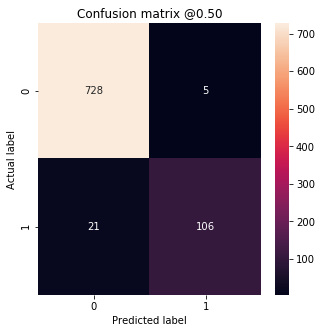

In [82]:
train_predictions_adasyn_elab = adasyn_model_elab.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_adasyn_elab = adasyn_model_elab.predict(test_features, batch_size=BATCH_SIZE)
adasyn_results_elab = adasyn_model_elab.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(adasyn_model_elab.metrics_names, smote_results_elab):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_adasyn_elab)

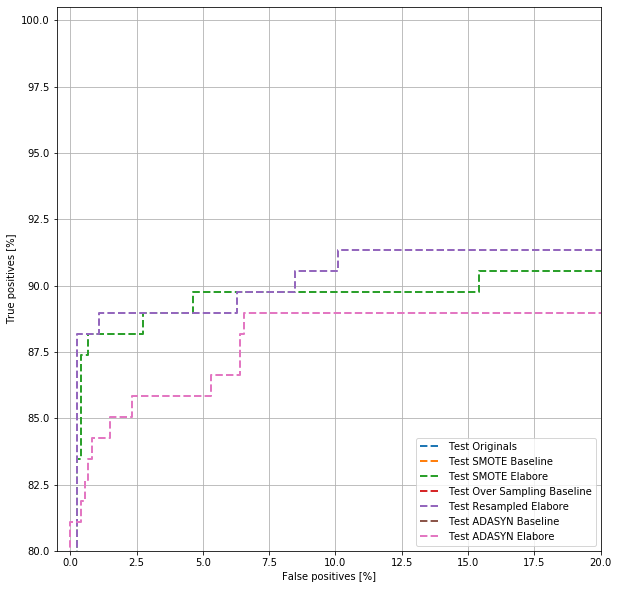

In [83]:
plot_roc("Test Originals", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plot_roc("Test SMOTE Baseline", test_labels, test_predictions_smote_baseline, color=colors[1], linestyle='--')
plot_roc("Test SMOTE Elabore", test_labels, test_predictions_smote_elab, color=colors[2], linestyle='--')
plot_roc("Test Over Sampling Baseline", test_labels, test_predictions_resampled, color=colors[3], linestyle='--')
plot_roc("Test Resampled Elabore", test_labels, test_predictions_resampled_elab, color=colors[4], linestyle='--')
plot_roc("Test ADASYN Baseline", test_labels, test_predictions_adasyn_baseline, color=colors[5], linestyle='--')
plot_roc("Test ADASYN Elabore", test_labels, test_predictions_adasyn_elab, color=colors[6], linestyle='--')
plt.legend(loc='lower right')

### Tomek Links

In [84]:
from imblearn.under_sampling import TomekLinks
underTomek = TomekLinks()
features_under_tomek, labels_under_tomek = underTomek.fit_resample(train_features, train_labels)

In [85]:
tomek_model_baseline = make_model_baseline()
tomek_model_baseline.load_weights(initial_weights_baseline)

# Reset the bias to zero, since this dataset is balanced.
output_layer = tomek_model_baseline.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = tomek_model_baseline.fit(
    features_under_tomek, 
    labels_under_tomek,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 2748 samples, validate for 1 steps
Epoch 1/100
2748/2748 [==============================] - 2s 891us/sample - loss: 0.8397 - tp: 190.0000 - fp: 1016.0000 - tn: 1270.0000 - fn: 272.0000 - accuracy: 0.5313 - precision: 0.1575 - recall: 0.4113 - auc: 0.4660 - val_loss: 0.5888 - val_tp: 28.0000 - val_fp: 122.0000 - val_tn: 460.0000 - val_fn: 78.0000 - val_accuracy: 0.7093 - val_precision: 0.1867 - val_recall: 0.2642 - val_auc: 0.4877
Epoch 2/100
2748/2748 [==============================] - 0s 148us/sample - loss: 0.6391 - tp: 123.0000 - fp: 548.0000 - tn: 1738.0000 - fn: 339.0000 - accuracy: 0.6772 - precision: 0.1833 - recall: 0.2662 - auc: 0.5154 - val_loss: 0.4809 - val_tp: 9.0000 - val_fp: 15.0000 - val_tn: 567.0000 - val_fn: 97.0000 - val_accuracy: 0.8372 - val_precision: 0.3750 - val_recall: 0.0849 - val_auc: 0.5623
Epoch 3/100
2748/2748 [==============================] - 0s 149us/sample - loss: 0.5543 - tp: 94.0000 - fp: 274.0000 - tn: 2012.0000 - fn: 368.0000 - accuracy: 0

Epoch 22/100
2748/2748 [==============================] - 0s 146us/sample - loss: 0.3845 - tp: 88.0000 - fp: 55.0000 - tn: 2231.0000 - fn: 374.0000 - accuracy: 0.8439 - precision: 0.6154 - recall: 0.1905 - auc: 0.7638 - val_loss: 0.3688 - val_tp: 13.0000 - val_fp: 4.0000 - val_tn: 578.0000 - val_fn: 93.0000 - val_accuracy: 0.8590 - val_precision: 0.7647 - val_recall: 0.1226 - val_auc: 0.7615
Epoch 23/100
2748/2748 [==============================] - 0s 147us/sample - loss: 0.3821 - tp: 79.0000 - fp: 49.0000 - tn: 2237.0000 - fn: 383.0000 - accuracy: 0.8428 - precision: 0.6172 - recall: 0.1710 - auc: 0.7727 - val_loss: 0.3685 - val_tp: 12.0000 - val_fp: 5.0000 - val_tn: 577.0000 - val_fn: 94.0000 - val_accuracy: 0.8561 - val_precision: 0.7059 - val_recall: 0.1132 - val_auc: 0.7610
Epoch 24/100
2748/2748 [==============================] - 0s 146us/sample - loss: 0.3811 - tp: 99.0000 - fp: 46.0000 - tn: 2240.0000 - fn: 363.0000 - accuracy: 0.8512 - precision: 0.6828 - recall: 0.2143 - auc:

Epoch 43/100
2748/2748 [==============================] - 0s 147us/sample - loss: 0.3639 - tp: 106.0000 - fp: 52.0000 - tn: 2234.0000 - fn: 356.0000 - accuracy: 0.8515 - precision: 0.6709 - recall: 0.2294 - auc: 0.8007 - val_loss: 0.3581 - val_tp: 17.0000 - val_fp: 7.0000 - val_tn: 575.0000 - val_fn: 89.0000 - val_accuracy: 0.8605 - val_precision: 0.7083 - val_recall: 0.1604 - val_auc: 0.7772
Epoch 44/100
2748/2748 [==============================] - 0s 147us/sample - loss: 0.3575 - tp: 109.0000 - fp: 50.0000 - tn: 2236.0000 - fn: 353.0000 - accuracy: 0.8533 - precision: 0.6855 - recall: 0.2359 - auc: 0.8079 - val_loss: 0.3584 - val_tp: 17.0000 - val_fp: 7.0000 - val_tn: 575.0000 - val_fn: 89.0000 - val_accuracy: 0.8605 - val_precision: 0.7083 - val_recall: 0.1604 - val_auc: 0.7756
Epoch 45/100
2748/2748 [==============================] - 0s 148us/sample - loss: 0.3554 - tp: 109.0000 - fp: 56.0000 - tn: 2230.0000 - fn: 353.0000 - accuracy: 0.8512 - precision: 0.6606 - recall: 0.2359 - a

Epoch 64/100
2748/2748 [==============================] - 0s 150us/sample - loss: 0.3402 - tp: 128.0000 - fp: 56.0000 - tn: 2230.0000 - fn: 334.0000 - accuracy: 0.8581 - precision: 0.6957 - recall: 0.2771 - auc: 0.8343 - val_loss: 0.3522 - val_tp: 21.0000 - val_fp: 10.0000 - val_tn: 572.0000 - val_fn: 85.0000 - val_accuracy: 0.8619 - val_precision: 0.6774 - val_recall: 0.1981 - val_auc: 0.7851
Epoch 65/100
2748/2748 [==============================] - 0s 147us/sample - loss: 0.3524 - tp: 100.0000 - fp: 56.0000 - tn: 2230.0000 - fn: 362.0000 - accuracy: 0.8479 - precision: 0.6410 - recall: 0.2165 - auc: 0.8222 - val_loss: 0.3520 - val_tp: 20.0000 - val_fp: 10.0000 - val_tn: 572.0000 - val_fn: 86.0000 - val_accuracy: 0.8605 - val_precision: 0.6667 - val_recall: 0.1887 - val_auc: 0.7844
Epoch 66/100
2748/2748 [==============================] - 0s 147us/sample - loss: 0.3490 - tp: 115.0000 - fp: 62.0000 - tn: 2224.0000 - fn: 347.0000 - accuracy: 0.8512 - precision: 0.6497 - recall: 0.2489 -

Epoch 85/100
2748/2748 [==============================] - 0s 148us/sample - loss: 0.3350 - tp: 134.0000 - fp: 52.0000 - tn: 2234.0000 - fn: 328.0000 - accuracy: 0.8617 - precision: 0.7204 - recall: 0.2900 - auc: 0.8400 - val_loss: 0.3474 - val_tp: 19.0000 - val_fp: 9.0000 - val_tn: 573.0000 - val_fn: 87.0000 - val_accuracy: 0.8605 - val_precision: 0.6786 - val_recall: 0.1792 - val_auc: 0.7920
Epoch 86/100
2748/2748 [==============================] - 0s 147us/sample - loss: 0.3325 - tp: 136.0000 - fp: 64.0000 - tn: 2222.0000 - fn: 326.0000 - accuracy: 0.8581 - precision: 0.6800 - recall: 0.2944 - auc: 0.8484 - val_loss: 0.3478 - val_tp: 20.0000 - val_fp: 8.0000 - val_tn: 574.0000 - val_fn: 86.0000 - val_accuracy: 0.8634 - val_precision: 0.7143 - val_recall: 0.1887 - val_auc: 0.7919
Epoch 87/100
2748/2748 [==============================] - 0s 148us/sample - loss: 0.3333 - tp: 135.0000 - fp: 61.0000 - tn: 2225.0000 - fn: 327.0000 - accuracy: 0.8588 - precision: 0.6888 - recall: 0.2922 - a

loss :  0.3330952525138855
tp :  18.0
fp :  8.0
tn :  725.0
fn :  109.0
accuracy :  0.8639535
precision :  0.6923077
recall :  0.14173229
auc :  0.8086228

Legitimate Transactions Detected (True Negatives):  725
Legitimate Transactions Incorrectly Detected (False Positives):  8
Fraudulent Transactions Missed (False Negatives):  109
Fraudulent Transactions Detected (True Positives):  18
Total Fraudulent Transactions:  127


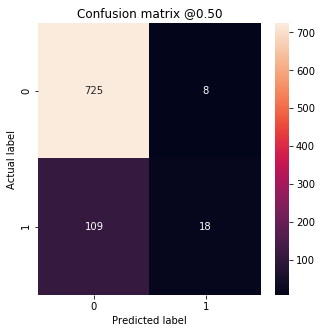

In [86]:
train_predictions_tomek_baseline = tomek_model_baseline.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_tomek_baseline = tomek_model_baseline.predict(test_features, batch_size=BATCH_SIZE)
tomek_results_baseline = tomek_model_baseline.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(tomek_model_baseline.metrics_names, tomek_results_baseline):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_tomek_baseline)

### modele elabore

In [87]:
tomek_model_elab = make_model_elab()
tomek_model_elab.load_weights(initial_weights_elab)

# Reset the bias to zero, since this dataset is balanced.
output_layer = tomek_model_elab.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = tomek_model_elab.fit(
    features_under_tomek, 
    labels_under_tomek,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 2748 samples, validate for 1 steps
Epoch 1/100
2748/2748 [==============================] - 4s 1ms/sample - loss: 0.5069 - tp: 2.0000 - fp: 58.0000 - tn: 2228.0000 - fn: 460.0000 - accuracy: 0.8115 - precision: 0.0333 - recall: 0.0043 - auc: 0.5204 - val_loss: 0.4231 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 582.0000 - val_fn: 106.0000 - val_accuracy: 0.8459 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7308
Epoch 2/100
2748/2748 [==============================] - 0s 166us/sample - loss: 0.4218 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 2286.0000 - fn: 462.0000 - accuracy: 0.8319 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7061 - val_loss: 0.3842 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 582.0000 - val_fn: 106.0000 - val_accuracy: 0.8459 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7398
Epoch 3/100
2748/2748 [==============================] - 0s 167us/sample - loss: 0.4058 - tp: 0.0000e+00 - fp: 1.0000 - tn: 2

2748/2748 [==============================] - 0s 167us/sample - loss: 0.1618 - tp: 378.0000 - fp: 79.0000 - tn: 2207.0000 - fn: 84.0000 - accuracy: 0.9407 - precision: 0.8271 - recall: 0.8182 - auc: 0.9686 - val_loss: 0.2262 - val_tp: 74.0000 - val_fp: 23.0000 - val_tn: 559.0000 - val_fn: 32.0000 - val_accuracy: 0.9201 - val_precision: 0.7629 - val_recall: 0.6981 - val_auc: 0.9218
Epoch 22/100
2748/2748 [==============================] - 0s 181us/sample - loss: 0.1498 - tp: 369.0000 - fp: 75.0000 - tn: 2211.0000 - fn: 93.0000 - accuracy: 0.9389 - precision: 0.8311 - recall: 0.7987 - auc: 0.9749 - val_loss: 0.2148 - val_tp: 73.0000 - val_fp: 16.0000 - val_tn: 566.0000 - val_fn: 33.0000 - val_accuracy: 0.9288 - val_precision: 0.8202 - val_recall: 0.6887 - val_auc: 0.9372
Epoch 23/100
2748/2748 [==============================] - 0s 166us/sample - loss: 0.1423 - tp: 376.0000 - fp: 57.0000 - tn: 2229.0000 - fn: 86.0000 - accuracy: 0.9480 - precision: 0.8684 - recall: 0.8139 - auc: 0.9762 - v

Epoch 42/100
2748/2748 [==============================] - 0s 166us/sample - loss: 0.0688 - tp: 426.0000 - fp: 31.0000 - tn: 2255.0000 - fn: 36.0000 - accuracy: 0.9756 - precision: 0.9322 - recall: 0.9221 - auc: 0.9936 - val_loss: 0.2019 - val_tp: 87.0000 - val_fp: 8.0000 - val_tn: 574.0000 - val_fn: 19.0000 - val_accuracy: 0.9608 - val_precision: 0.9158 - val_recall: 0.8208 - val_auc: 0.9450
Epoch 43/100
2748/2748 [==============================] - 0s 165us/sample - loss: 0.0680 - tp: 421.0000 - fp: 31.0000 - tn: 2255.0000 - fn: 41.0000 - accuracy: 0.9738 - precision: 0.9314 - recall: 0.9113 - auc: 0.9941 - val_loss: 0.2106 - val_tp: 90.0000 - val_fp: 11.0000 - val_tn: 571.0000 - val_fn: 16.0000 - val_accuracy: 0.9608 - val_precision: 0.8911 - val_recall: 0.8491 - val_auc: 0.9405
Epoch 00043: early stopping


loss :  0.20012933015823364
tp :  95.0
fp :  5.0
tn :  728.0
fn :  32.0
accuracy :  0.9569768
precision :  0.95
recall :  0.7480315
auc :  0.93903816

Legitimate Transactions Detected (True Negatives):  728
Legitimate Transactions Incorrectly Detected (False Positives):  5
Fraudulent Transactions Missed (False Negatives):  32
Fraudulent Transactions Detected (True Positives):  95
Total Fraudulent Transactions:  127


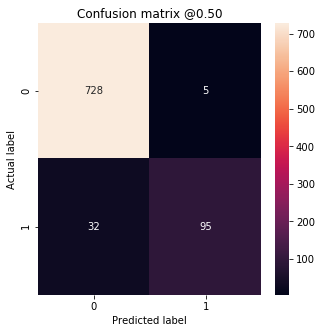

In [88]:
train_predictions_tomek_elab = tomek_model_elab.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_tomek_elab = tomek_model_elab.predict(test_features, batch_size=BATCH_SIZE)
tomek_results_elab = tomek_model_elab.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(tomek_model_elab.metrics_names, tomek_results_elab):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_tomek_elab)

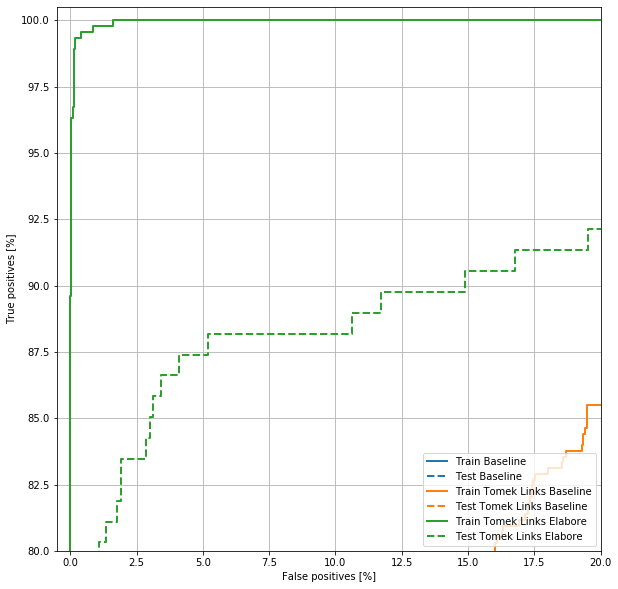

In [89]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Tomek Links Baseline", train_labels, train_predictions_tomek_baseline, color=colors[1])
plot_roc("Test Tomek Links Baseline", test_labels, test_predictions_tomek_baseline, color=colors[1], linestyle='--')

plot_roc("Train Tomek Links Elabore", train_labels, train_predictions_tomek_elab, color=colors[2])
plot_roc("Test Tomek Links Elabore", test_labels, test_predictions_tomek_elab, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

### Random Under Sampling

In [90]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy="majority")
train_features_RandomUnderSampler, train_labels_RandomUnderSampler = undersampler.fit_resample(train_features, train_labels)

In [91]:
randomUnderSampler_model_baseline = make_model_baseline()
randomUnderSampler_model_baseline.load_weights(initial_weights_baseline)

# Reset the bias to zero, since this dataset is balanced.
output_layer = adasyn_model_baseline.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = randomUnderSampler_model_baseline.fit(
    train_features_RandomUnderSampler,
    train_labels_RandomUnderSampler,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 924 samples, validate for 1 steps
Epoch 1/100
924/924 [==============================] - 2s 2ms/sample - loss: 1.0772 - tp: 54.0000 - fp: 80.0000 - tn: 382.0000 - fn: 408.0000 - accuracy: 0.4719 - precision: 0.4030 - recall: 0.1169 - auc: 0.4571 - val_loss: 0.5094 - val_tp: 2.0000 - val_fp: 38.0000 - val_tn: 544.0000 - val_fn: 104.0000 - val_accuracy: 0.7936 - val_precision: 0.0500 - val_recall: 0.0189 - val_auc: 0.4777
Epoch 2/100
924/924 [==============================] - 0s 166us/sample - loss: 0.9518 - tp: 105.0000 - fp: 90.0000 - tn: 372.0000 - fn: 357.0000 - accuracy: 0.5162 - precision: 0.5385 - recall: 0.2273 - auc: 0.5095 - val_loss: 0.4990 - val_tp: 12.0000 - val_fp: 44.0000 - val_tn: 538.0000 - val_fn: 94.0000 - val_accuracy: 0.7994 - val_precision: 0.2143 - val_recall: 0.1132 - val_auc: 0.5319
Epoch 3/100
924/924 [==============================] - 0s 161us/sample - loss: 0.8623 - tp: 124.0000 - fp: 77.0000 - tn: 385.0000 - fn: 338.0000 - accuracy: 0.5509 - precisio

Epoch 22/100
924/924 [==============================] - 0s 161us/sample - loss: 0.6105 - tp: 275.0000 - fp: 104.0000 - tn: 358.0000 - fn: 187.0000 - accuracy: 0.6851 - precision: 0.7256 - recall: 0.5952 - auc: 0.7364 - val_loss: 0.5606 - val_tp: 67.0000 - val_fp: 148.0000 - val_tn: 434.0000 - val_fn: 39.0000 - val_accuracy: 0.7282 - val_precision: 0.3116 - val_recall: 0.6321 - val_auc: 0.7569
Epoch 23/100
924/924 [==============================] - 0s 161us/sample - loss: 0.6104 - tp: 279.0000 - fp: 115.0000 - tn: 347.0000 - fn: 183.0000 - accuracy: 0.6775 - precision: 0.7081 - recall: 0.6039 - auc: 0.7332 - val_loss: 0.5532 - val_tp: 66.0000 - val_fp: 145.0000 - val_tn: 437.0000 - val_fn: 40.0000 - val_accuracy: 0.7311 - val_precision: 0.3128 - val_recall: 0.6226 - val_auc: 0.7585
Epoch 24/100
924/924 [==============================] - 0s 167us/sample - loss: 0.5977 - tp: 270.0000 - fp: 103.0000 - tn: 359.0000 - fn: 192.0000 - accuracy: 0.6807 - precision: 0.7239 - recall: 0.5844 - auc

Epoch 43/100
924/924 [==============================] - 0s 159us/sample - loss: 0.5693 - tp: 268.0000 - fp: 94.0000 - tn: 368.0000 - fn: 194.0000 - accuracy: 0.6883 - precision: 0.7403 - recall: 0.5801 - auc: 0.7814 - val_loss: 0.5635 - val_tp: 68.0000 - val_fp: 150.0000 - val_tn: 432.0000 - val_fn: 38.0000 - val_accuracy: 0.7267 - val_precision: 0.3119 - val_recall: 0.6415 - val_auc: 0.7658
Epoch 44/100
924/924 [==============================] - 0s 165us/sample - loss: 0.5403 - tp: 302.0000 - fp: 93.0000 - tn: 369.0000 - fn: 160.0000 - accuracy: 0.7262 - precision: 0.7646 - recall: 0.6537 - auc: 0.8030 - val_loss: 0.5629 - val_tp: 69.0000 - val_fp: 152.0000 - val_tn: 430.0000 - val_fn: 37.0000 - val_accuracy: 0.7253 - val_precision: 0.3122 - val_recall: 0.6509 - val_auc: 0.7651
Epoch 45/100
924/924 [==============================] - 0s 160us/sample - loss: 0.5637 - tp: 297.0000 - fp: 96.0000 - tn: 366.0000 - fn: 165.0000 - accuracy: 0.7175 - precision: 0.7557 - recall: 0.6429 - auc: 0

loss :  0.4249444603919983
tp :  90.0
fp :  142.0
tn :  591.0
fn :  37.0
accuracy :  0.79186046
precision :  0.38793105
recall :  0.70866144
auc :  0.82323205

Legitimate Transactions Detected (True Negatives):  571
Legitimate Transactions Incorrectly Detected (False Positives):  162
Fraudulent Transactions Missed (False Negatives):  49
Fraudulent Transactions Detected (True Positives):  78
Total Fraudulent Transactions:  127


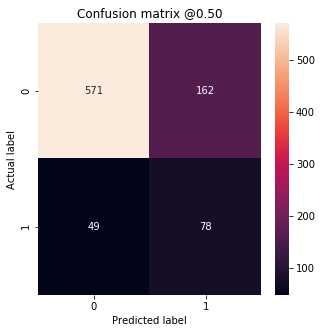

In [92]:
train_predictions_randomUnderSampler_baseline = randomUnderSampler_model_baseline.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_randomUnderSampler_baseline = randomUnderSampler_model_baseline.predict(test_features, batch_size=BATCH_SIZE)
randomUnderSampler_results_baseline = randomUnderSampler_model_baseline.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(randomUnderSampler_model_baseline.metrics_names, adasyn_results_baseline):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_randomUnderSampler_baseline)

### Modele Elaboré

In [93]:
randomUnderSampler_model_elab = make_model_elab()
randomUnderSampler_model_elab.load_weights(initial_weights_elab)

# Reset the bias to zero, since this dataset is balanced.
output_layer = randomUnderSampler_model_elab.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = randomUnderSampler_model_elab.fit(
    train_features_RandomUnderSampler,
    train_labels_RandomUnderSampler,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 924 samples, validate for 1 steps
Epoch 1/100
924/924 [==============================] - 2s 3ms/sample - loss: 0.6931 - tp: 176.0000 - fp: 145.0000 - tn: 317.0000 - fn: 286.0000 - accuracy: 0.5335 - precision: 0.5483 - recall: 0.3810 - auc: 0.5353 - val_loss: 0.6885 - val_tp: 73.0000 - val_fp: 289.0000 - val_tn: 293.0000 - val_fn: 33.0000 - val_accuracy: 0.5320 - val_precision: 0.2017 - val_recall: 0.6887 - val_auc: 0.6465
Epoch 2/100
924/924 [==============================] - 0s 190us/sample - loss: 0.6861 - tp: 242.0000 - fp: 183.0000 - tn: 279.0000 - fn: 220.0000 - accuracy: 0.5639 - precision: 0.5694 - recall: 0.5238 - auc: 0.5780 - val_loss: 0.6786 - val_tp: 76.0000 - val_fp: 235.0000 - val_tn: 347.0000 - val_fn: 30.0000 - val_accuracy: 0.6148 - val_precision: 0.2444 - val_recall: 0.7170 - val_auc: 0.7073
Epoch 3/100
924/924 [==============================] - 0s 183us/sample - loss: 0.6540 - tp: 297.0000 - fp: 174.0000 - tn: 288.0000 - fn: 165.0000 - accuracy: 0.6331 - pr

Epoch 22/100
924/924 [==============================] - 0s 185us/sample - loss: 0.3180 - tp: 407.0000 - fp: 56.0000 - tn: 406.0000 - fn: 55.0000 - accuracy: 0.8799 - precision: 0.8790 - recall: 0.8810 - auc: 0.9377 - val_loss: 0.4478 - val_tp: 77.0000 - val_fp: 106.0000 - val_tn: 476.0000 - val_fn: 29.0000 - val_accuracy: 0.8038 - val_precision: 0.4208 - val_recall: 0.7264 - val_auc: 0.8581
Epoch 23/100
924/924 [==============================] - 0s 186us/sample - loss: 0.2637 - tp: 409.0000 - fp: 44.0000 - tn: 418.0000 - fn: 53.0000 - accuracy: 0.8950 - precision: 0.9029 - recall: 0.8853 - auc: 0.9597 - val_loss: 0.5809 - val_tp: 91.0000 - val_fp: 156.0000 - val_tn: 426.0000 - val_fn: 15.0000 - val_accuracy: 0.7515 - val_precision: 0.3684 - val_recall: 0.8585 - val_auc: 0.8610
Epoch 24/100
924/924 [==============================] - 0s 185us/sample - loss: 0.2484 - tp: 428.0000 - fp: 55.0000 - tn: 407.0000 - fn: 34.0000 - accuracy: 0.9037 - precision: 0.8861 - recall: 0.9264 - auc: 0.96

Epoch 43/100
924/924 [==============================] - 0s 192us/sample - loss: 0.1774 - tp: 432.0000 - fp: 28.0000 - tn: 434.0000 - fn: 30.0000 - accuracy: 0.9372 - precision: 0.9391 - recall: 0.9351 - auc: 0.9797 - val_loss: 0.5789 - val_tp: 96.0000 - val_fp: 109.0000 - val_tn: 473.0000 - val_fn: 10.0000 - val_accuracy: 0.8270 - val_precision: 0.4683 - val_recall: 0.9057 - val_auc: 0.8913
Epoch 44/100
924/924 [==============================] - 0s 186us/sample - loss: 0.1232 - tp: 445.0000 - fp: 19.0000 - tn: 443.0000 - fn: 17.0000 - accuracy: 0.9610 - precision: 0.9591 - recall: 0.9632 - auc: 0.9901 - val_loss: 0.6918 - val_tp: 95.0000 - val_fp: 125.0000 - val_tn: 457.0000 - val_fn: 11.0000 - val_accuracy: 0.8023 - val_precision: 0.4318 - val_recall: 0.8962 - val_auc: 0.8917
Epoch 45/100
924/924 [==============================] - 0s 187us/sample - loss: 0.1322 - tp: 442.0000 - fp: 30.0000 - tn: 432.0000 - fn: 20.0000 - accuracy: 0.9459 - precision: 0.9364 - recall: 0.9567 - auc: 0.98

924/924 [==============================] - 0s 182us/sample - loss: 0.0960 - tp: 448.0000 - fp: 17.0000 - tn: 445.0000 - fn: 14.0000 - accuracy: 0.9665 - precision: 0.9634 - recall: 0.9697 - auc: 0.9928 - val_loss: 0.6455 - val_tp: 94.0000 - val_fp: 99.0000 - val_tn: 483.0000 - val_fn: 12.0000 - val_accuracy: 0.8387 - val_precision: 0.4870 - val_recall: 0.8868 - val_auc: 0.8986
Epoch 64/100
924/924 [==============================] - 0s 186us/sample - loss: 0.1117 - tp: 445.0000 - fp: 19.0000 - tn: 443.0000 - fn: 17.0000 - accuracy: 0.9610 - precision: 0.9591 - recall: 0.9632 - auc: 0.9900 - val_loss: 0.7412 - val_tp: 96.0000 - val_fp: 123.0000 - val_tn: 459.0000 - val_fn: 10.0000 - val_accuracy: 0.8067 - val_precision: 0.4384 - val_recall: 0.9057 - val_auc: 0.9033
Epoch 65/100
924/924 [==============================] - 0s 189us/sample - loss: 0.0966 - tp: 445.0000 - fp: 17.0000 - tn: 445.0000 - fn: 17.0000 - accuracy: 0.9632 - precision: 0.9632 - recall: 0.9632 - auc: 0.9942 - val_loss:

Epoch 84/100
924/924 [==============================] - 0s 183us/sample - loss: 0.0832 - tp: 451.0000 - fp: 15.0000 - tn: 447.0000 - fn: 11.0000 - accuracy: 0.9719 - precision: 0.9678 - recall: 0.9762 - auc: 0.9949 - val_loss: 0.6452 - val_tp: 94.0000 - val_fp: 89.0000 - val_tn: 493.0000 - val_fn: 12.0000 - val_accuracy: 0.8532 - val_precision: 0.5137 - val_recall: 0.8868 - val_auc: 0.8997
Epoch 85/100
924/924 [==============================] - 0s 182us/sample - loss: 0.0642 - tp: 457.0000 - fp: 9.0000 - tn: 453.0000 - fn: 5.0000 - accuracy: 0.9848 - precision: 0.9807 - recall: 0.9892 - auc: 0.9960 - val_loss: 0.6381 - val_tp: 95.0000 - val_fp: 85.0000 - val_tn: 497.0000 - val_fn: 11.0000 - val_accuracy: 0.8605 - val_precision: 0.5278 - val_recall: 0.8962 - val_auc: 0.8976
Epoch 86/100
924/924 [==============================] - 0s 190us/sample - loss: 0.0467 - tp: 458.0000 - fp: 5.0000 - tn: 457.0000 - fn: 4.0000 - accuracy: 0.9903 - precision: 0.9892 - recall: 0.9913 - auc: 0.9974 - v

loss :  0.6442006230354309
tp :  114.0
fp :  143.0
tn :  590.0
fn :  13.0
accuracy :  0.81860465
precision :  0.44357976
recall :  0.8976378
auc :  0.912462

Legitimate Transactions Detected (True Negatives):  590
Legitimate Transactions Incorrectly Detected (False Positives):  143
Fraudulent Transactions Missed (False Negatives):  13
Fraudulent Transactions Detected (True Positives):  114
Total Fraudulent Transactions:  127


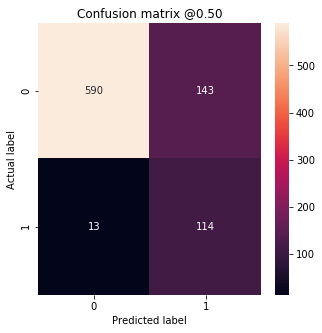

In [94]:
train_predictions_randomUnderSampler_elab = randomUnderSampler_model_elab.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_randomUnderSampler_elab = randomUnderSampler_model_elab.predict(test_features, batch_size=BATCH_SIZE)
randomUnderSampler_results_elab = randomUnderSampler_model_elab.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(randomUnderSampler_model_elab.metrics_names, randomUnderSampler_results_elab):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_randomUnderSampler_elab)

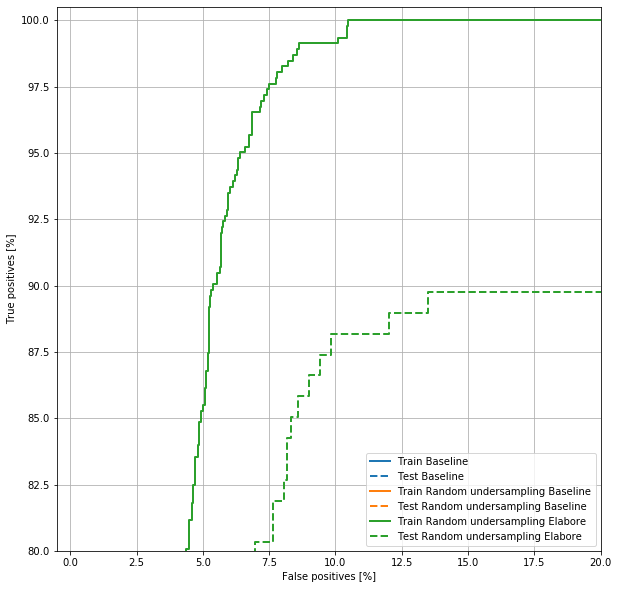

In [95]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Random undersampling Baseline", train_labels, train_predictions_randomUnderSampler_baseline, color=colors[1])
plot_roc("Test Random undersampling Baseline", test_labels, test_predictions_randomUnderSampler_baseline, color=colors[1], linestyle='--')

plot_roc("Train Random undersampling Elabore", train_labels, train_predictions_randomUnderSampler_elab, color=colors[2])
plot_roc("Test Random undersampling Elabore", test_labels, test_predictions_randomUnderSampler_elab, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

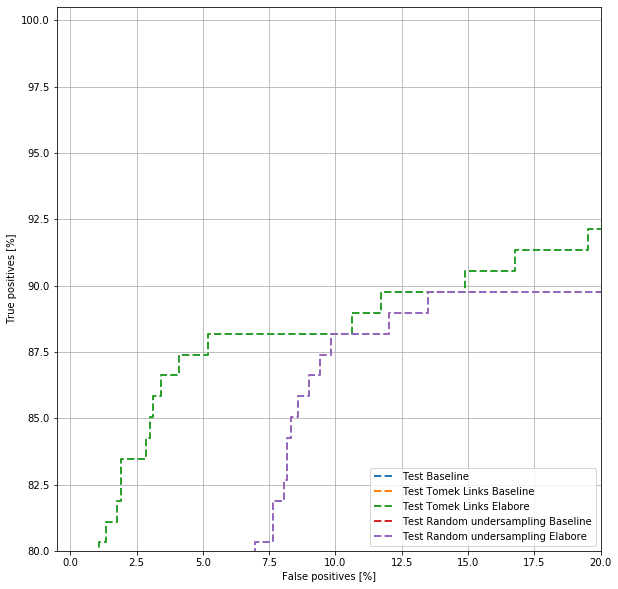

In [96]:
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Test Tomek Links Baseline", test_labels, test_predictions_tomek_baseline, color=colors[1], linestyle='--')
plot_roc("Test Tomek Links Elabore", test_labels, test_predictions_tomek_elab, color=colors[2], linestyle='--')
plot_roc("Test Random undersampling Baseline", test_labels, test_predictions_randomUnderSampler_baseline, color=colors[3], linestyle='--')
plot_roc("Test Random undersampling Elabore", test_labels, test_predictions_randomUnderSampler_elab, color=colors[4], linestyle='--')

plt.legend(loc='lower right')

### Approches Hybrides

### RandomOverSampling + Tomek Links

In [97]:
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler

over_sampling = RandomOverSampler(sampling_strategy="minority")

features_RandomOverSampler, labels_RandomOverSampler = over_sampling.fit_resample(train_features, train_labels)

underTomek = TomekLinks()
features_ROS_tomek, labels_ROS_tomek = underTomek.fit_resample(features_RandomOverSampler, labels_RandomOverSampler)

In [98]:
ROS_tomek_model_baseline = make_model_baseline()
ROS_tomek_model_baseline.load_weights(initial_weights_baseline)

# Reset the bias to zero, since this dataset is balanced.
output_layer = ROS_tomek_model_baseline.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = ROS_tomek_model_baseline.fit(
    features_ROS_tomek, 
    labels_ROS_tomek,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 4580 samples, validate for 1 steps
Epoch 1/100
4580/4580 [==============================] - 3s 586us/sample - loss: 0.8263 - tp: 1323.0000 - fp: 1238.0000 - tn: 1052.0000 - fn: 967.0000 - accuracy: 0.5186 - precision: 0.5166 - recall: 0.5777 - auc: 0.5169 - val_loss: 0.7040 - val_tp: 66.0000 - val_fp: 290.0000 - val_tn: 292.0000 - val_fn: 40.0000 - val_accuracy: 0.5203 - val_precision: 0.1854 - val_recall: 0.6226 - val_auc: 0.6195
Epoch 2/100
4580/4580 [==============================] - 1s 143us/sample - loss: 0.7076 - tp: 1441.0000 - fp: 1021.0000 - tn: 1269.0000 - fn: 849.0000 - accuracy: 0.5917 - precision: 0.5853 - recall: 0.6293 - auc: 0.6170 - val_loss: 0.6432 - val_tp: 69.0000 - val_fp: 218.0000 - val_tn: 364.0000 - val_fn: 37.0000 - val_accuracy: 0.6294 - val_precision: 0.2404 - val_recall: 0.6509 - val_auc: 0.7044
Epoch 3/100
4580/4580 [==============================] - 1s 144us/sample - loss: 0.6596 - tp: 1454.0000 - fp: 929.0000 - tn: 1361.0000 - fn: 836.0000 - accu

4580/4580 [==============================] - 1s 141us/sample - loss: 0.5188 - tp: 1664.0000 - fp: 544.0000 - tn: 1746.0000 - fn: 626.0000 - accuracy: 0.7445 - precision: 0.7536 - recall: 0.7266 - auc: 0.8219 - val_loss: 0.4978 - val_tp: 67.0000 - val_fp: 131.0000 - val_tn: 451.0000 - val_fn: 39.0000 - val_accuracy: 0.7529 - val_precision: 0.3384 - val_recall: 0.6321 - val_auc: 0.7906
Epoch 22/100
4580/4580 [==============================] - 1s 143us/sample - loss: 0.5052 - tp: 1746.0000 - fp: 566.0000 - tn: 1724.0000 - fn: 544.0000 - accuracy: 0.7576 - precision: 0.7552 - recall: 0.7624 - auc: 0.8326 - val_loss: 0.4900 - val_tp: 68.0000 - val_fp: 124.0000 - val_tn: 458.0000 - val_fn: 38.0000 - val_accuracy: 0.7645 - val_precision: 0.3542 - val_recall: 0.6415 - val_auc: 0.7934
Epoch 23/100
4580/4580 [==============================] - 1s 143us/sample - loss: 0.5121 - tp: 1690.0000 - fp: 541.0000 - tn: 1749.0000 - fn: 600.0000 - accuracy: 0.7509 - precision: 0.7575 - recall: 0.7380 - auc:

4580/4580 [==============================] - 1s 141us/sample - loss: 0.4723 - tp: 1830.0000 - fp: 555.0000 - tn: 1735.0000 - fn: 460.0000 - accuracy: 0.7784 - precision: 0.7673 - recall: 0.7991 - auc: 0.8571 - val_loss: 0.4728 - val_tp: 76.0000 - val_fp: 140.0000 - val_tn: 442.0000 - val_fn: 30.0000 - val_accuracy: 0.7529 - val_precision: 0.3519 - val_recall: 0.7170 - val_auc: 0.8091
Epoch 42/100
4580/4580 [==============================] - 1s 141us/sample - loss: 0.4786 - tp: 1780.0000 - fp: 554.0000 - tn: 1736.0000 - fn: 510.0000 - accuracy: 0.7677 - precision: 0.7626 - recall: 0.7773 - auc: 0.8522 - val_loss: 0.4816 - val_tp: 76.0000 - val_fp: 143.0000 - val_tn: 439.0000 - val_fn: 30.0000 - val_accuracy: 0.7485 - val_precision: 0.3470 - val_recall: 0.7170 - val_auc: 0.8073
Epoch 43/100
4580/4580 [==============================] - 1s 140us/sample - loss: 0.4682 - tp: 1812.0000 - fp: 566.0000 - tn: 1724.0000 - fn: 478.0000 - accuracy: 0.7721 - precision: 0.7620 - recall: 0.7913 - auc:

4580/4580 [==============================] - 1s 143us/sample - loss: 0.4621 - tp: 1969.0000 - fp: 715.0000 - tn: 1575.0000 - fn: 321.0000 - accuracy: 0.7738 - precision: 0.7336 - recall: 0.8598 - auc: 0.8602 - val_loss: 0.4521 - val_tp: 74.0000 - val_fp: 135.0000 - val_tn: 447.0000 - val_fn: 32.0000 - val_accuracy: 0.7573 - val_precision: 0.3541 - val_recall: 0.6981 - val_auc: 0.8193
Epoch 62/100
4580/4580 [==============================] - 1s 143us/sample - loss: 0.4629 - tp: 1944.0000 - fp: 724.0000 - tn: 1566.0000 - fn: 346.0000 - accuracy: 0.7664 - precision: 0.7286 - recall: 0.8489 - auc: 0.8598 - val_loss: 0.4539 - val_tp: 76.0000 - val_fp: 137.0000 - val_tn: 445.0000 - val_fn: 30.0000 - val_accuracy: 0.7573 - val_precision: 0.3568 - val_recall: 0.7170 - val_auc: 0.8192
Epoch 63/100
4580/4580 [==============================] - 1s 142us/sample - loss: 0.4513 - tp: 1960.0000 - fp: 690.0000 - tn: 1600.0000 - fn: 330.0000 - accuracy: 0.7773 - precision: 0.7396 - recall: 0.8559 - auc:

4580/4580 [==============================] - 1s 151us/sample - loss: 0.4484 - tp: 1853.0000 - fp: 582.0000 - tn: 1708.0000 - fn: 437.0000 - accuracy: 0.7775 - precision: 0.7610 - recall: 0.8092 - auc: 0.8703 - val_loss: 0.4381 - val_tp: 77.0000 - val_fp: 134.0000 - val_tn: 448.0000 - val_fn: 29.0000 - val_accuracy: 0.7631 - val_precision: 0.3649 - val_recall: 0.7264 - val_auc: 0.8311
Epoch 82/100
4580/4580 [==============================] - 1s 143us/sample - loss: 0.4497 - tp: 2014.0000 - fp: 732.0000 - tn: 1558.0000 - fn: 276.0000 - accuracy: 0.7799 - precision: 0.7334 - recall: 0.8795 - auc: 0.8677 - val_loss: 0.4364 - val_tp: 78.0000 - val_fp: 130.0000 - val_tn: 452.0000 - val_fn: 28.0000 - val_accuracy: 0.7703 - val_precision: 0.3750 - val_recall: 0.7358 - val_auc: 0.8328
Epoch 83/100
4580/4580 [==============================] - 1s 144us/sample - loss: 0.4397 - tp: 2028.0000 - fp: 727.0000 - tn: 1563.0000 - fn: 262.0000 - accuracy: 0.7841 - precision: 0.7361 - recall: 0.8856 - auc:

loss :  0.4400934875011444
tp :  85.0
fp :  145.0
tn :  588.0
fn :  42.0
accuracy :  0.78255814
precision :  0.36956522
recall :  0.6692913
auc :  0.82388735

Legitimate Transactions Detected (True Negatives):  588
Legitimate Transactions Incorrectly Detected (False Positives):  145
Fraudulent Transactions Missed (False Negatives):  42
Fraudulent Transactions Detected (True Positives):  85
Total Fraudulent Transactions:  127


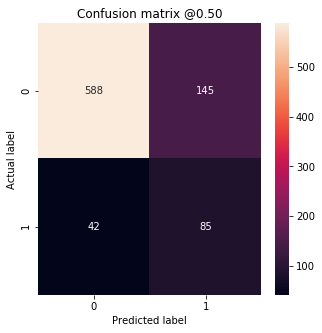

In [99]:
train_predictions_ROS_tomek_baseline = ROS_tomek_model_baseline.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_ROS_tomek_baseline = ROS_tomek_model_baseline.predict(test_features, batch_size=BATCH_SIZE)
ROS_tomek_results_baseline = ROS_tomek_model_baseline.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(ROS_tomek_model_baseline.metrics_names, ROS_tomek_results_baseline):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_ROS_tomek_baseline)

###  modele elaboré

In [100]:
ROS_tomek_elab = make_model_elab()
ROS_tomek_elab.load_weights(initial_weights_elab)

# Reset the bias to zero, since this dataset is balanced.
output_layer = ROS_tomek_elab.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = ROS_tomek_elab.fit(
    features_ROS_tomek, 
    labels_ROS_tomek,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 4580 samples, validate for 1 steps
Epoch 1/100
4580/4580 [==============================] - 3s 673us/sample - loss: 0.6667 - tp: 1310.0000 - fp: 932.0000 - tn: 1358.0000 - fn: 980.0000 - accuracy: 0.5825 - precision: 0.5843 - recall: 0.5721 - auc: 0.6230 - val_loss: 0.5720 - val_tp: 64.0000 - val_fp: 150.0000 - val_tn: 432.0000 - val_fn: 42.0000 - val_accuracy: 0.7209 - val_precision: 0.2991 - val_recall: 0.6038 - val_auc: 0.7563
Epoch 2/100
4580/4580 [==============================] - 1s 167us/sample - loss: 0.5601 - tp: 1584.0000 - fp: 605.0000 - tn: 1685.0000 - fn: 706.0000 - accuracy: 0.7138 - precision: 0.7236 - recall: 0.6917 - auc: 0.7869 - val_loss: 0.5553 - val_tp: 76.0000 - val_fp: 180.0000 - val_tn: 402.0000 - val_fn: 30.0000 - val_accuracy: 0.6948 - val_precision: 0.2969 - val_recall: 0.7170 - val_auc: 0.7896
Epoch 3/100
4580/4580 [==============================] - 1s 165us/sample - loss: 0.4850 - tp: 1776.0000 - fp: 539.0000 - tn: 1751.0000 - fn: 514.0000 - accura

4580/4580 [==============================] - 1s 162us/sample - loss: 0.1195 - tp: 2214.0000 - fp: 104.0000 - tn: 2186.0000 - fn: 76.0000 - accuracy: 0.9607 - precision: 0.9551 - recall: 0.9668 - auc: 0.9899 - val_loss: 0.1916 - val_tp: 93.0000 - val_fp: 10.0000 - val_tn: 572.0000 - val_fn: 13.0000 - val_accuracy: 0.9666 - val_precision: 0.9029 - val_recall: 0.8774 - val_auc: 0.9406
Epoch 22/100
4580/4580 [==============================] - 1s 164us/sample - loss: 0.1092 - tp: 2205.0000 - fp: 87.0000 - tn: 2203.0000 - fn: 85.0000 - accuracy: 0.9624 - precision: 0.9620 - recall: 0.9629 - auc: 0.9916 - val_loss: 0.2101 - val_tp: 94.0000 - val_fp: 11.0000 - val_tn: 571.0000 - val_fn: 12.0000 - val_accuracy: 0.9666 - val_precision: 0.8952 - val_recall: 0.8868 - val_auc: 0.9430
Epoch 23/100
4580/4580 [==============================] - 1s 163us/sample - loss: 0.0939 - tp: 2217.0000 - fp: 68.0000 - tn: 2222.0000 - fn: 73.0000 - accuracy: 0.9692 - precision: 0.9702 - recall: 0.9681 - auc: 0.9936

loss :  0.20819158852100372
tp :  110.0
fp :  14.0
tn :  719.0
fn :  17.0
accuracy :  0.9639535
precision :  0.88709676
recall :  0.86614174
auc :  0.935692

Legitimate Transactions Detected (True Negatives):  719
Legitimate Transactions Incorrectly Detected (False Positives):  14
Fraudulent Transactions Missed (False Negatives):  17
Fraudulent Transactions Detected (True Positives):  110
Total Fraudulent Transactions:  127


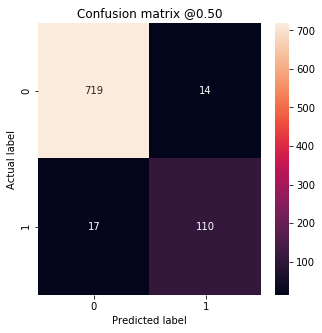

In [101]:
train_predictions_ROS_tomek_elab = ROS_tomek_elab.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_ROS_tomek_elab = ROS_tomek_elab.predict(test_features, batch_size=BATCH_SIZE)
ROS_tomek_results_elab = ROS_tomek_elab.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(ROS_tomek_elab.metrics_names, ROS_tomek_results_elab):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_ROS_tomek_elab)

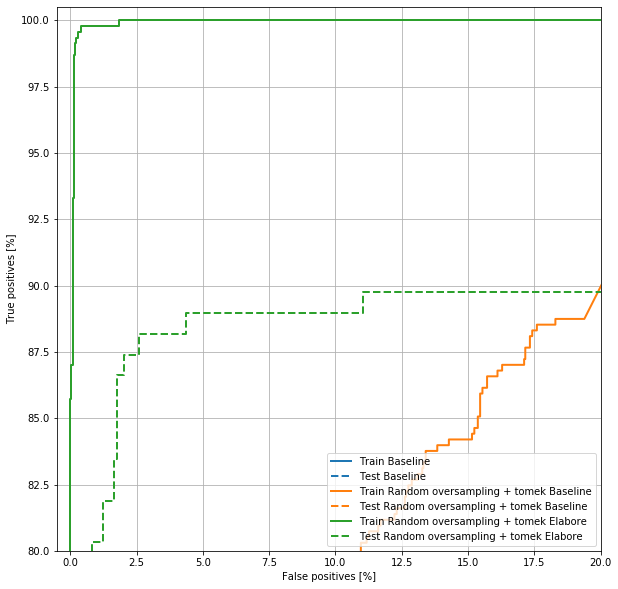

In [102]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Random oversampling + tomek Baseline", train_labels, train_predictions_ROS_tomek_baseline, color=colors[1])
plot_roc("Test Random oversampling + tomek Baseline", test_labels, test_predictions_ROS_tomek_baseline, color=colors[1], linestyle='--')

plot_roc("Train Random oversampling + tomek Elabore", train_labels, train_predictions_ROS_tomek_elab, color=colors[2])
plot_roc("Test Random oversampling + tomek Elabore", test_labels, test_predictions_ROS_tomek_elab, color=colors[2], linestyle='--')
plt.legend(loc='lower right')

### SMOTE + Tomek Links

In [103]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)

features_SMOTE_tomek, labels_SMOTE_tomek = smt.fit_sample(train_features, train_labels)



In [104]:
smote_tomek_model_baseline = make_model_baseline()
smote_tomek_model_baseline.load_weights(initial_weights_baseline)

# Reset the bias to zero, since this dataset is balanced.
output_layer = smote_tomek_model_baseline.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = smote_tomek_model_baseline.fit(
    features_SMOTE_tomek,
    labels_SMOTE_tomek,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 4580 samples, validate for 1 steps
Epoch 1/100
4580/4580 [==============================] - 3s 601us/sample - loss: 0.8214 - tp: 1303.0000 - fp: 1211.0000 - tn: 1079.0000 - fn: 987.0000 - accuracy: 0.5201 - precision: 0.5183 - recall: 0.5690 - auc: 0.5175 - val_loss: 0.6955 - val_tp: 64.0000 - val_fp: 287.0000 - val_tn: 295.0000 - val_fn: 42.0000 - val_accuracy: 0.5218 - val_precision: 0.1823 - val_recall: 0.6038 - val_auc: 0.6248
Epoch 2/100
4580/4580 [==============================] - 1s 145us/sample - loss: 0.6879 - tp: 1505.0000 - fp: 996.0000 - tn: 1294.0000 - fn: 785.0000 - accuracy: 0.6111 - precision: 0.6018 - recall: 0.6572 - auc: 0.6399 - val_loss: 0.6267 - val_tp: 67.0000 - val_fp: 206.0000 - val_tn: 376.0000 - val_fn: 39.0000 - val_accuracy: 0.6439 - val_precision: 0.2454 - val_recall: 0.6321 - val_auc: 0.7041
Epoch 3/100
4580/4580 [==============================] - 1s 145us/sample - loss: 0.6478 - tp: 1507.0000 - fp: 870.0000 - tn: 1420.0000 - fn: 783.0000 - accur

4580/4580 [==============================] - 1s 146us/sample - loss: 0.4773 - tp: 1746.0000 - fp: 527.0000 - tn: 1763.0000 - fn: 544.0000 - accuracy: 0.7662 - precision: 0.7681 - recall: 0.7624 - auc: 0.8499 - val_loss: 0.4844 - val_tp: 68.0000 - val_fp: 127.0000 - val_tn: 455.0000 - val_fn: 38.0000 - val_accuracy: 0.7602 - val_precision: 0.3487 - val_recall: 0.6415 - val_auc: 0.7803
Epoch 22/100
4580/4580 [==============================] - 1s 145us/sample - loss: 0.4857 - tp: 1751.0000 - fp: 549.0000 - tn: 1741.0000 - fn: 539.0000 - accuracy: 0.7624 - precision: 0.7613 - recall: 0.7646 - auc: 0.8453 - val_loss: 0.4784 - val_tp: 66.0000 - val_fp: 127.0000 - val_tn: 455.0000 - val_fn: 40.0000 - val_accuracy: 0.7573 - val_precision: 0.3420 - val_recall: 0.6226 - val_auc: 0.7805
Epoch 23/100
4580/4580 [==============================] - 1s 145us/sample - loss: 0.4731 - tp: 1784.0000 - fp: 533.0000 - tn: 1757.0000 - fn: 506.0000 - accuracy: 0.7731 - precision: 0.7700 - recall: 0.7790 - auc:

4580/4580 [==============================] - 1s 147us/sample - loss: 0.4428 - tp: 1965.0000 - fp: 651.0000 - tn: 1639.0000 - fn: 325.0000 - accuracy: 0.7869 - precision: 0.7511 - recall: 0.8581 - auc: 0.8739 - val_loss: 0.4544 - val_tp: 69.0000 - val_fp: 129.0000 - val_tn: 453.0000 - val_fn: 37.0000 - val_accuracy: 0.7587 - val_precision: 0.3485 - val_recall: 0.6509 - val_auc: 0.7973
Epoch 42/100
4580/4580 [==============================] - 1s 146us/sample - loss: 0.4440 - tp: 1950.0000 - fp: 664.0000 - tn: 1626.0000 - fn: 340.0000 - accuracy: 0.7808 - precision: 0.7460 - recall: 0.8515 - auc: 0.8712 - val_loss: 0.4555 - val_tp: 70.0000 - val_fp: 127.0000 - val_tn: 455.0000 - val_fn: 36.0000 - val_accuracy: 0.7631 - val_precision: 0.3553 - val_recall: 0.6604 - val_auc: 0.7976
Epoch 43/100
4580/4580 [==============================] - 1s 145us/sample - loss: 0.4416 - tp: 1960.0000 - fp: 633.0000 - tn: 1657.0000 - fn: 330.0000 - accuracy: 0.7897 - precision: 0.7559 - recall: 0.8559 - auc:

4580/4580 [==============================] - 1s 146us/sample - loss: 0.4320 - tp: 2015.0000 - fp: 688.0000 - tn: 1602.0000 - fn: 275.0000 - accuracy: 0.7897 - precision: 0.7455 - recall: 0.8799 - auc: 0.8764 - val_loss: 0.4362 - val_tp: 72.0000 - val_fp: 115.0000 - val_tn: 467.0000 - val_fn: 34.0000 - val_accuracy: 0.7834 - val_precision: 0.3850 - val_recall: 0.6792 - val_auc: 0.8082
Epoch 62/100
4580/4580 [==============================] - 1s 147us/sample - loss: 0.4379 - tp: 2039.0000 - fp: 712.0000 - tn: 1578.0000 - fn: 251.0000 - accuracy: 0.7897 - precision: 0.7412 - recall: 0.8904 - auc: 0.8774 - val_loss: 0.4326 - val_tp: 70.0000 - val_fp: 112.0000 - val_tn: 470.0000 - val_fn: 36.0000 - val_accuracy: 0.7849 - val_precision: 0.3846 - val_recall: 0.6604 - val_auc: 0.8079
Epoch 63/100
4580/4580 [==============================] - 1s 145us/sample - loss: 0.4203 - tp: 2039.0000 - fp: 662.0000 - tn: 1628.0000 - fn: 251.0000 - accuracy: 0.8007 - precision: 0.7549 - recall: 0.8904 - auc:

4580/4580 [==============================] - 1s 147us/sample - loss: 0.4200 - tp: 2061.0000 - fp: 718.0000 - tn: 1572.0000 - fn: 229.0000 - accuracy: 0.7932 - precision: 0.7416 - recall: 0.9000 - auc: 0.8832 - val_loss: 0.4283 - val_tp: 72.0000 - val_fp: 110.0000 - val_tn: 472.0000 - val_fn: 34.0000 - val_accuracy: 0.7907 - val_precision: 0.3956 - val_recall: 0.6792 - val_auc: 0.8163
Epoch 82/100
4580/4580 [==============================] - 1s 145us/sample - loss: 0.4124 - tp: 2044.0000 - fp: 702.0000 - tn: 1588.0000 - fn: 246.0000 - accuracy: 0.7930 - precision: 0.7444 - recall: 0.8926 - auc: 0.8895 - val_loss: 0.4288 - val_tp: 73.0000 - val_fp: 110.0000 - val_tn: 472.0000 - val_fn: 33.0000 - val_accuracy: 0.7922 - val_precision: 0.3989 - val_recall: 0.6887 - val_auc: 0.8182
Epoch 83/100
4580/4580 [==============================] - 1s 145us/sample - loss: 0.4085 - tp: 2078.0000 - fp: 716.0000 - tn: 1574.0000 - fn: 212.0000 - accuracy: 0.7974 - precision: 0.7437 - recall: 0.9074 - auc:

loss :  0.4241269528865814
tp :  86.0
fp :  141.0
tn :  592.0
fn :  41.0
accuracy :  0.7883721
precision :  0.37885463
recall :  0.6771653
auc :  0.82100314

Legitimate Transactions Detected (True Negatives):  592
Legitimate Transactions Incorrectly Detected (False Positives):  141
Fraudulent Transactions Missed (False Negatives):  41
Fraudulent Transactions Detected (True Positives):  86
Total Fraudulent Transactions:  127


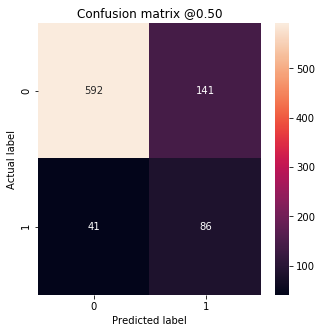

In [105]:
train_predictions_SMOTE_tomek_baseline = smote_tomek_model_baseline.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_SMOTE_tomek_baseline = smote_tomek_model_baseline.predict(test_features, batch_size=BATCH_SIZE)
SMOTE_tomek_results_baseline = smote_tomek_model_baseline.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(smote_tomek_model_baseline.metrics_names, SMOTE_tomek_results_baseline):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_SMOTE_tomek_baseline)

### modele elaboré

In [106]:
smote_tomek_elab = make_model_elab()
smote_tomek_elab.load_weights(initial_weights_elab)

# Reset the bias to zero, since this dataset is balanced.
output_layer = smote_tomek_elab.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = smote_tomek_elab.fit(
    features_SMOTE_tomek, 
    labels_SMOTE_tomek,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=val_ds)

Train on 4580 samples, validate for 1 steps
Epoch 1/100
4580/4580 [==============================] - 3s 664us/sample - loss: 0.6420 - tp: 1234.0000 - fp: 692.0000 - tn: 1598.0000 - fn: 1056.0000 - accuracy: 0.6183 - precision: 0.6407 - recall: 0.5389 - auc: 0.6763 - val_loss: 0.5266 - val_tp: 57.0000 - val_fp: 104.0000 - val_tn: 478.0000 - val_fn: 49.0000 - val_accuracy: 0.7776 - val_precision: 0.3540 - val_recall: 0.5377 - val_auc: 0.7346
Epoch 2/100
4580/4580 [==============================] - 1s 165us/sample - loss: 0.5164 - tp: 1694.0000 - fp: 554.0000 - tn: 1736.0000 - fn: 596.0000 - accuracy: 0.7489 - precision: 0.7536 - recall: 0.7397 - auc: 0.8264 - val_loss: 0.4611 - val_tp: 69.0000 - val_fp: 120.0000 - val_tn: 462.0000 - val_fn: 37.0000 - val_accuracy: 0.7718 - val_precision: 0.3651 - val_recall: 0.6509 - val_auc: 0.7883
Epoch 3/100
4580/4580 [==============================] - 1s 165us/sample - loss: 0.4383 - tp: 1872.0000 - fp: 486.0000 - tn: 1804.0000 - fn: 418.0000 - accur

4580/4580 [==============================] - 1s 162us/sample - loss: 0.1079 - tp: 2207.0000 - fp: 79.0000 - tn: 2211.0000 - fn: 83.0000 - accuracy: 0.9646 - precision: 0.9654 - recall: 0.9638 - auc: 0.9917 - val_loss: 0.2482 - val_tp: 91.0000 - val_fp: 26.0000 - val_tn: 556.0000 - val_fn: 15.0000 - val_accuracy: 0.9404 - val_precision: 0.7778 - val_recall: 0.8585 - val_auc: 0.9317
Epoch 22/100
4580/4580 [==============================] - 1s 163us/sample - loss: 0.0934 - tp: 2228.0000 - fp: 72.0000 - tn: 2218.0000 - fn: 62.0000 - accuracy: 0.9707 - precision: 0.9687 - recall: 0.9729 - auc: 0.9930 - val_loss: 0.2356 - val_tp: 87.0000 - val_fp: 11.0000 - val_tn: 571.0000 - val_fn: 19.0000 - val_accuracy: 0.9564 - val_precision: 0.8878 - val_recall: 0.8208 - val_auc: 0.9338
Epoch 23/100
4580/4580 [==============================] - 1s 163us/sample - loss: 0.0932 - tp: 2225.0000 - fp: 69.0000 - tn: 2221.0000 - fn: 65.0000 - accuracy: 0.9707 - precision: 0.9699 - recall: 0.9716 - auc: 0.9931 

Epoch 42/100
4580/4580 [==============================] - 1s 163us/sample - loss: 0.0506 - tp: 2257.0000 - fp: 41.0000 - tn: 2249.0000 - fn: 33.0000 - accuracy: 0.9838 - precision: 0.9822 - recall: 0.9856 - auc: 0.9981 - val_loss: 0.2917 - val_tp: 93.0000 - val_fp: 11.0000 - val_tn: 571.0000 - val_fn: 13.0000 - val_accuracy: 0.9651 - val_precision: 0.8942 - val_recall: 0.8774 - val_auc: 0.9450
Epoch 43/100
4580/4580 [==============================] - 1s 164us/sample - loss: 0.0547 - tp: 2245.0000 - fp: 43.0000 - tn: 2247.0000 - fn: 45.0000 - accuracy: 0.9808 - precision: 0.9812 - recall: 0.9803 - auc: 0.9976 - val_loss: 0.2709 - val_tp: 93.0000 - val_fp: 11.0000 - val_tn: 571.0000 - val_fn: 13.0000 - val_accuracy: 0.9651 - val_precision: 0.8942 - val_recall: 0.8774 - val_auc: 0.9413
Epoch 44/100
4580/4580 [==============================] - 1s 163us/sample - loss: 0.0560 - tp: 2247.0000 - fp: 49.0000 - tn: 2241.0000 - fn: 43.0000 - accuracy: 0.9799 - precision: 0.9787 - recall: 0.9812 -

loss :  0.29800426959991455
tp :  108.0
fp :  5.0
tn :  728.0
fn :  19.0
accuracy :  0.97209305
precision :  0.9557522
recall :  0.8503937
auc :  0.9440333

Legitimate Transactions Detected (True Negatives):  728
Legitimate Transactions Incorrectly Detected (False Positives):  5
Fraudulent Transactions Missed (False Negatives):  19
Fraudulent Transactions Detected (True Positives):  108
Total Fraudulent Transactions:  127


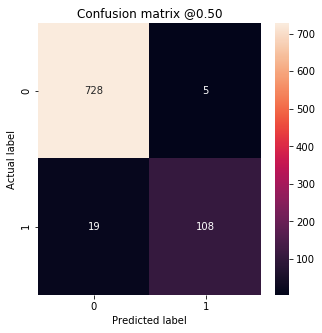

In [107]:
train_predictions_smote_tomek_elab = smote_tomek_elab.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_smote_tomek_elab = smote_tomek_elab.predict(test_features, batch_size=BATCH_SIZE)
smote_tomek_results_elab = smote_tomek_elab.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(smote_tomek_elab.metrics_names, smote_tomek_results_elab):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_smote_tomek_elab)

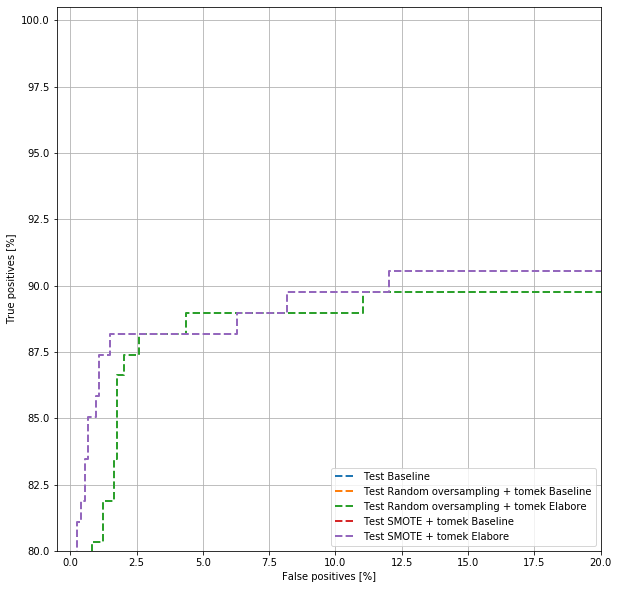

In [108]:
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plot_roc("Test Random oversampling + tomek Baseline", test_labels, test_predictions_ROS_tomek_baseline, color=colors[1], linestyle='--')
plot_roc("Test Random oversampling + tomek Elabore", test_labels, test_predictions_ROS_tomek_elab, color=colors[2], linestyle='--')
plot_roc("Test SMOTE + tomek Baseline", test_labels, test_predictions_SMOTE_tomek_baseline, color=colors[3], linestyle='--')
plot_roc("Test SMOTE + tomek Elabore", test_labels, test_predictions_smote_tomek_elab, color=colors[4], linestyle='--')
plt.legend(loc='lower right')